#Sistemes d'Aprenentatge Automàtic

##Xarxes Neuronals i Aprenentatge Profund

En aquest lliurament teniu tres preguntes, de 3, 3.5 i 3.5 punts.

La primera proposa modificar un sistema que teniu implementat al quadern de Colab enllaçat des dels apunts.

La segona consisteix a implementar una xarxa neuronal des de zero a partir de la seva descripció.

# 0. TensorFlow Playground
Experimentau amb https://playground.tensorflow.org/ la configuració de xarxes neuronals i tria de característiques per separar diferents conjunts de dades.

a. Triau el conjunt de dades de dos cercles concèntrics, sense cap capa interna. El model aconsegueix separar-los?

b. Quin és el mínim nombre de capes internes que necessitau per separar els dos cercles?

c. En el conjunt de dades de dos clústers separables linealment, és necessària alguna capa interna per poder-los distingir?

d. A les dades que correspon a la funció XOR, quina característica heu de triar per aconseguir separar les dades sense cap capa interna?

## a) 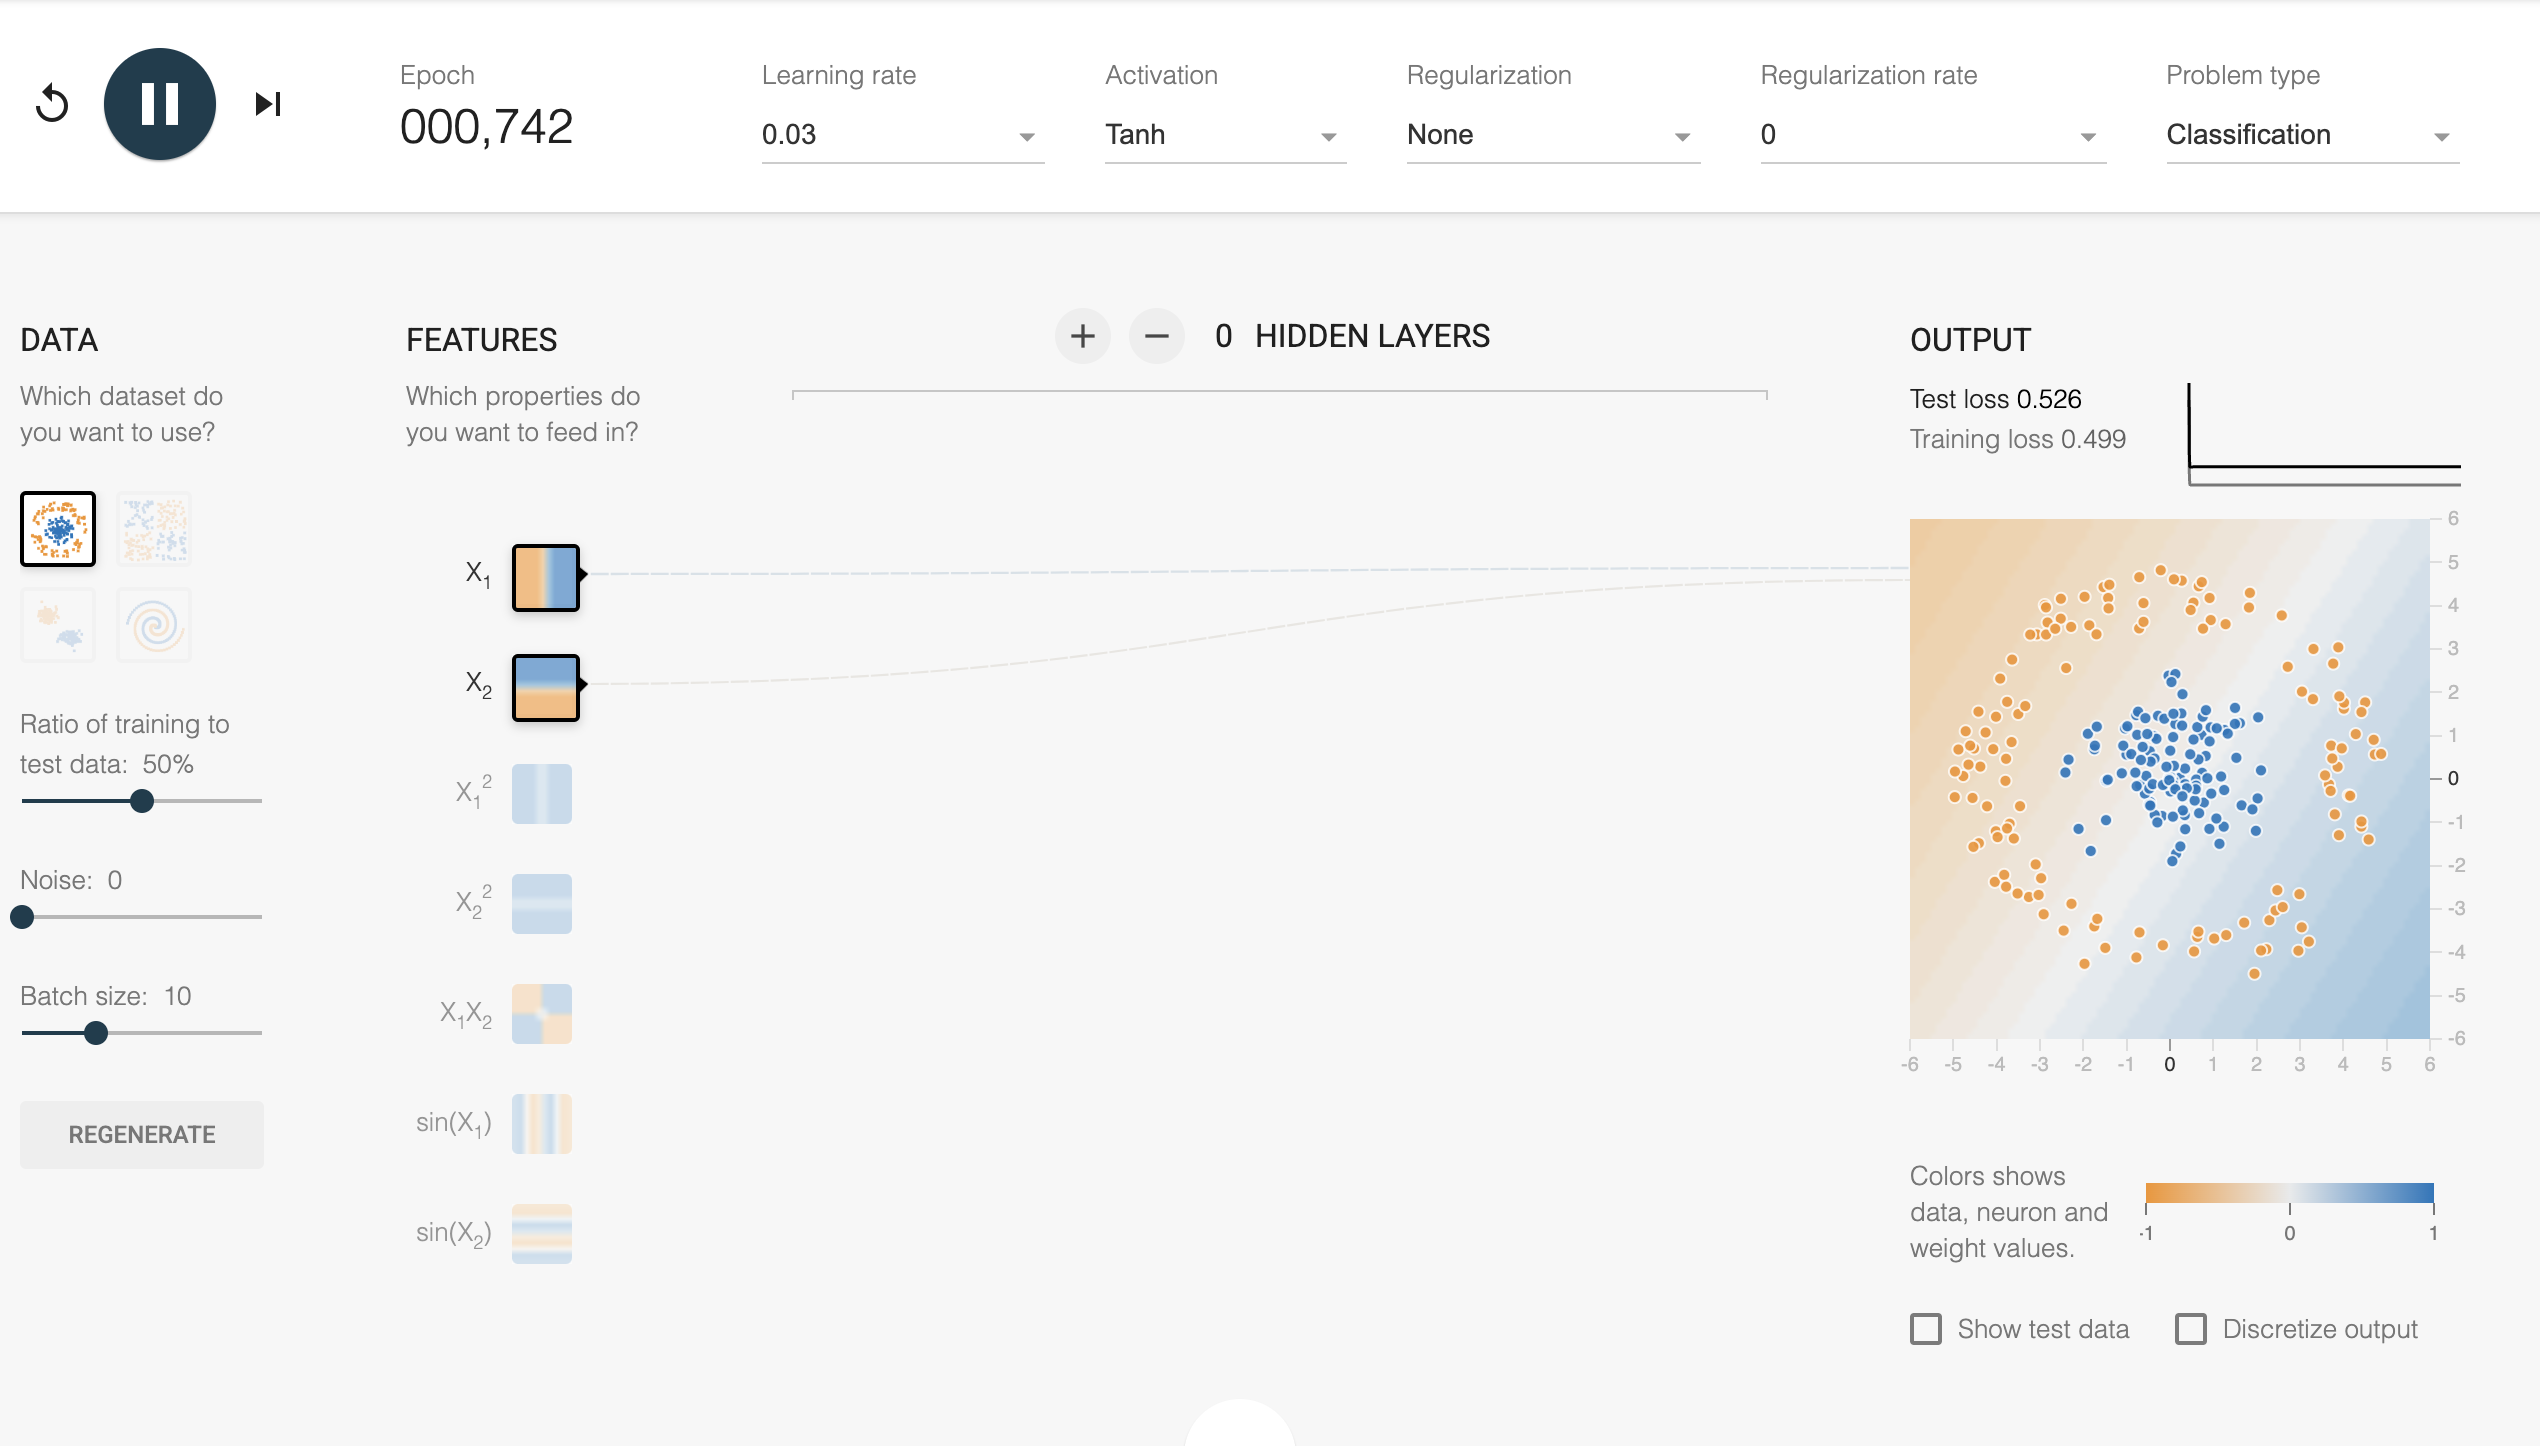

Vemos que el modelo no es capaz de separar los datos sin usar capas internas

## b) 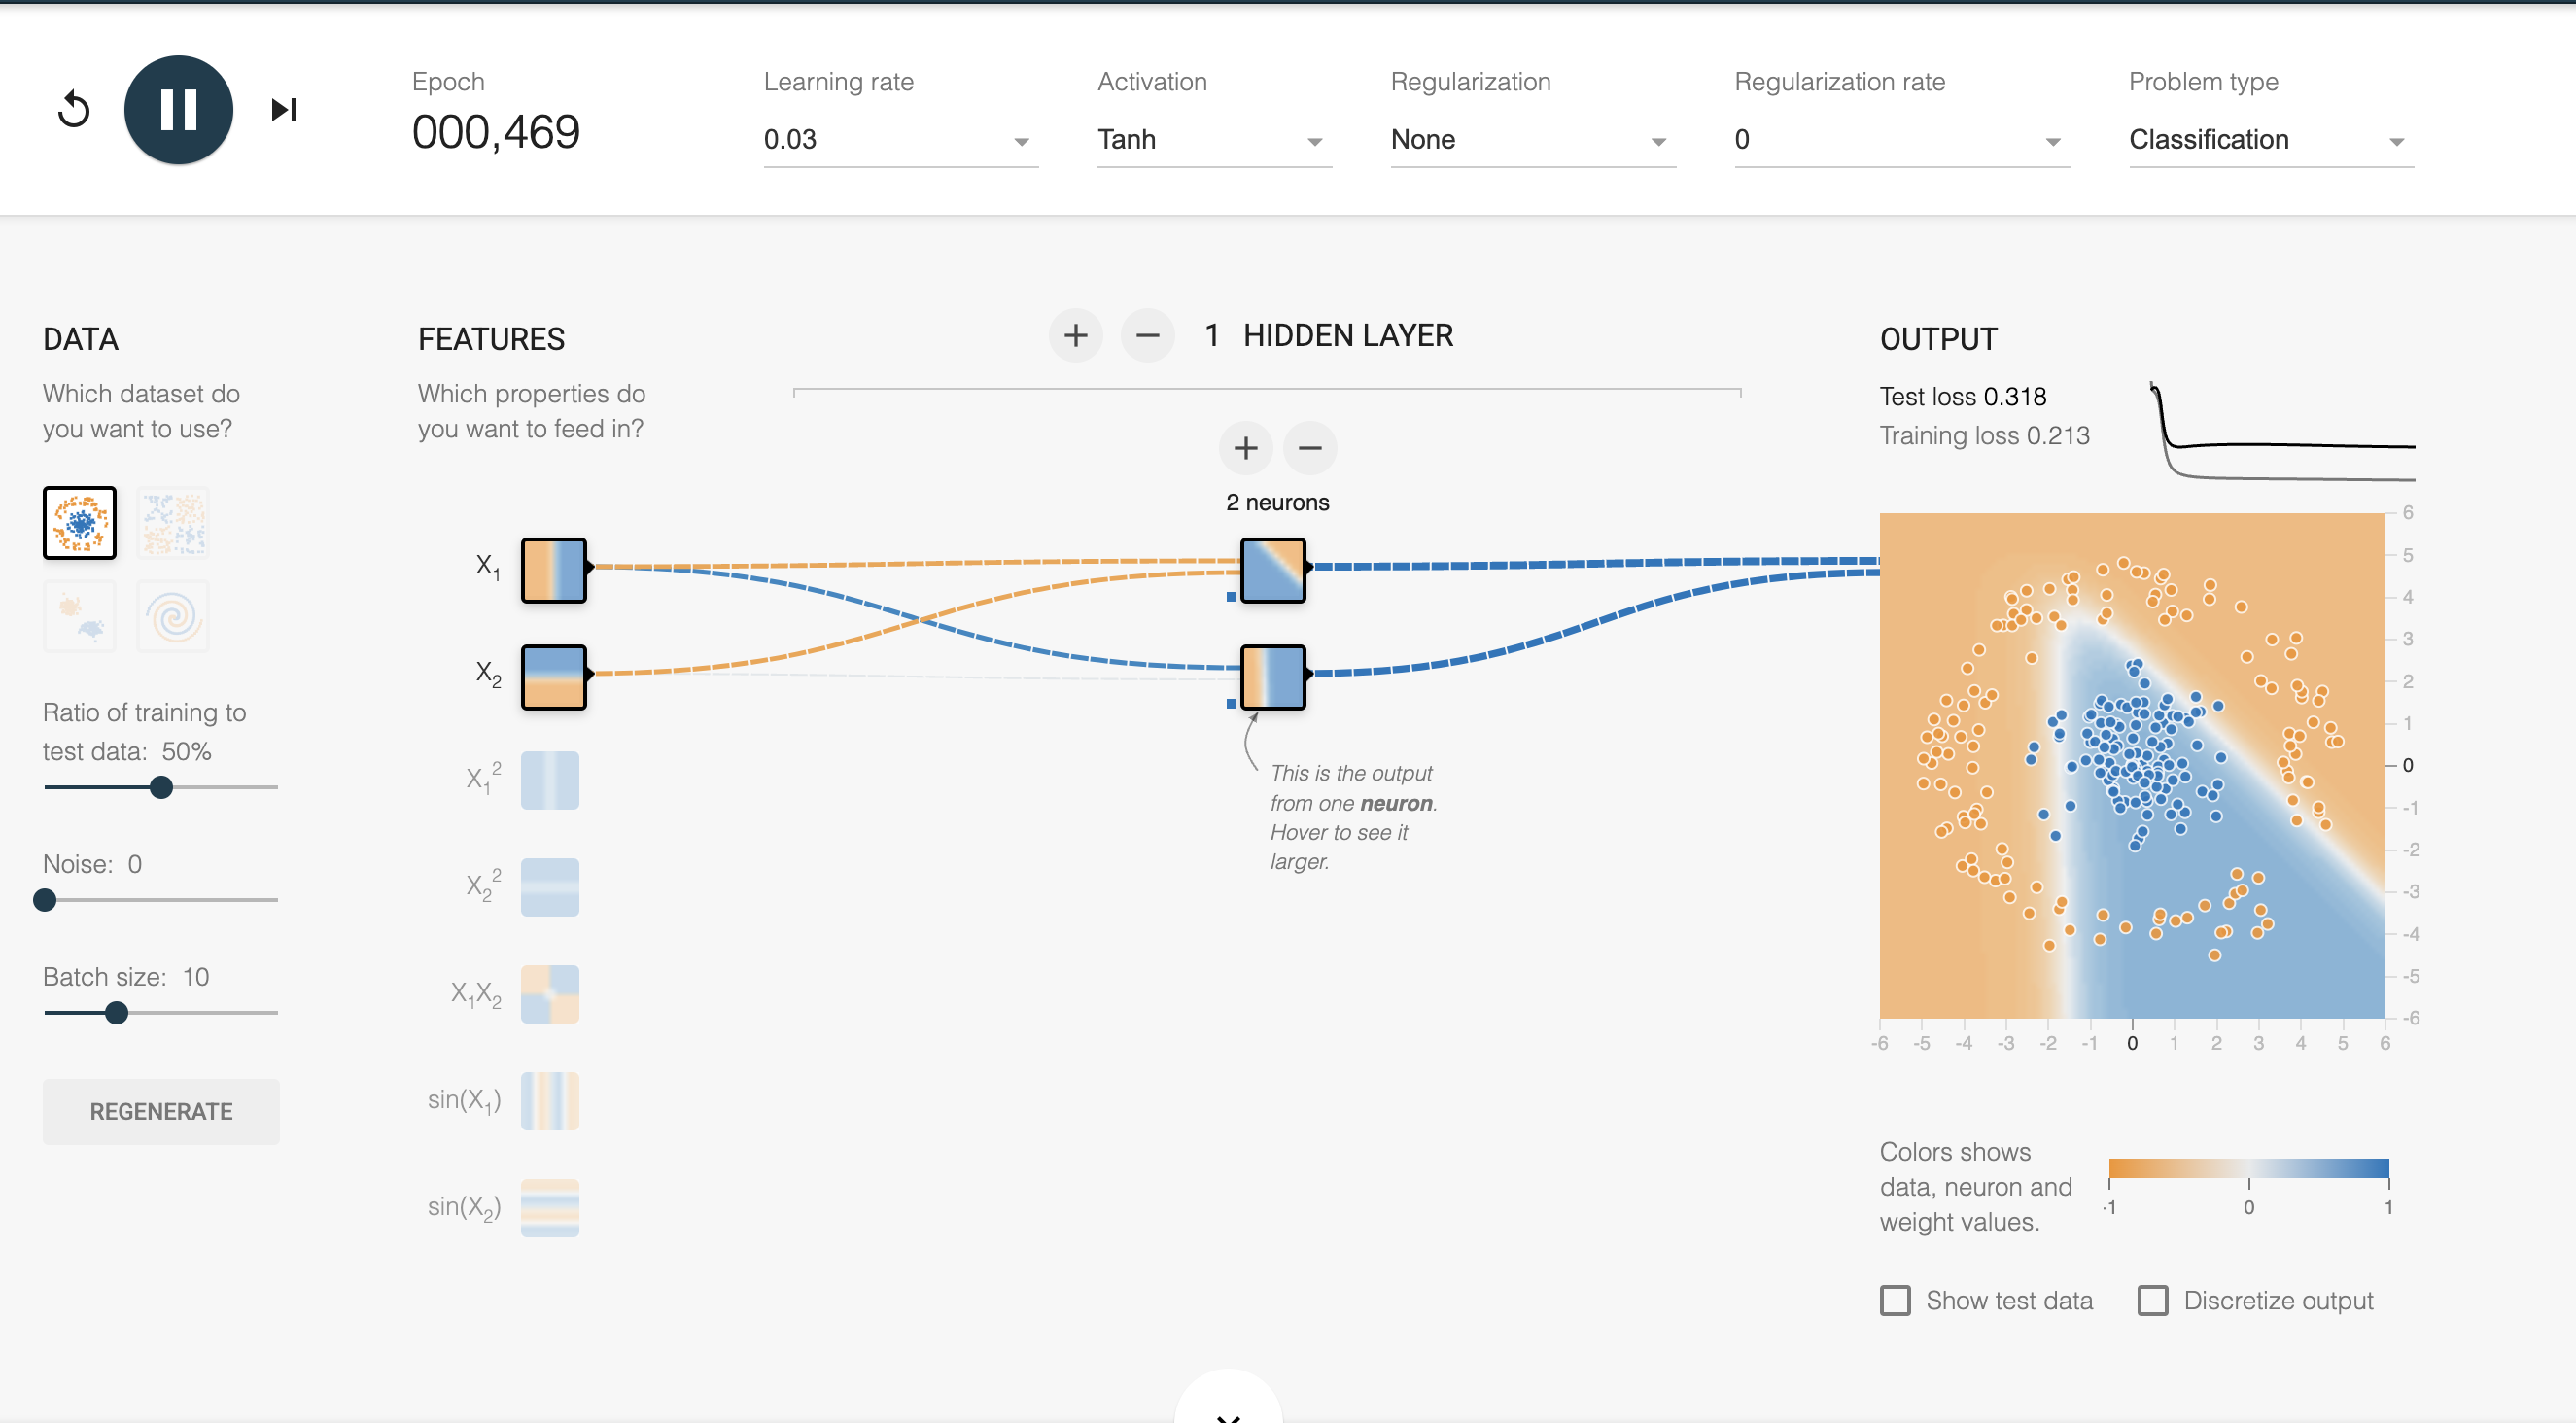

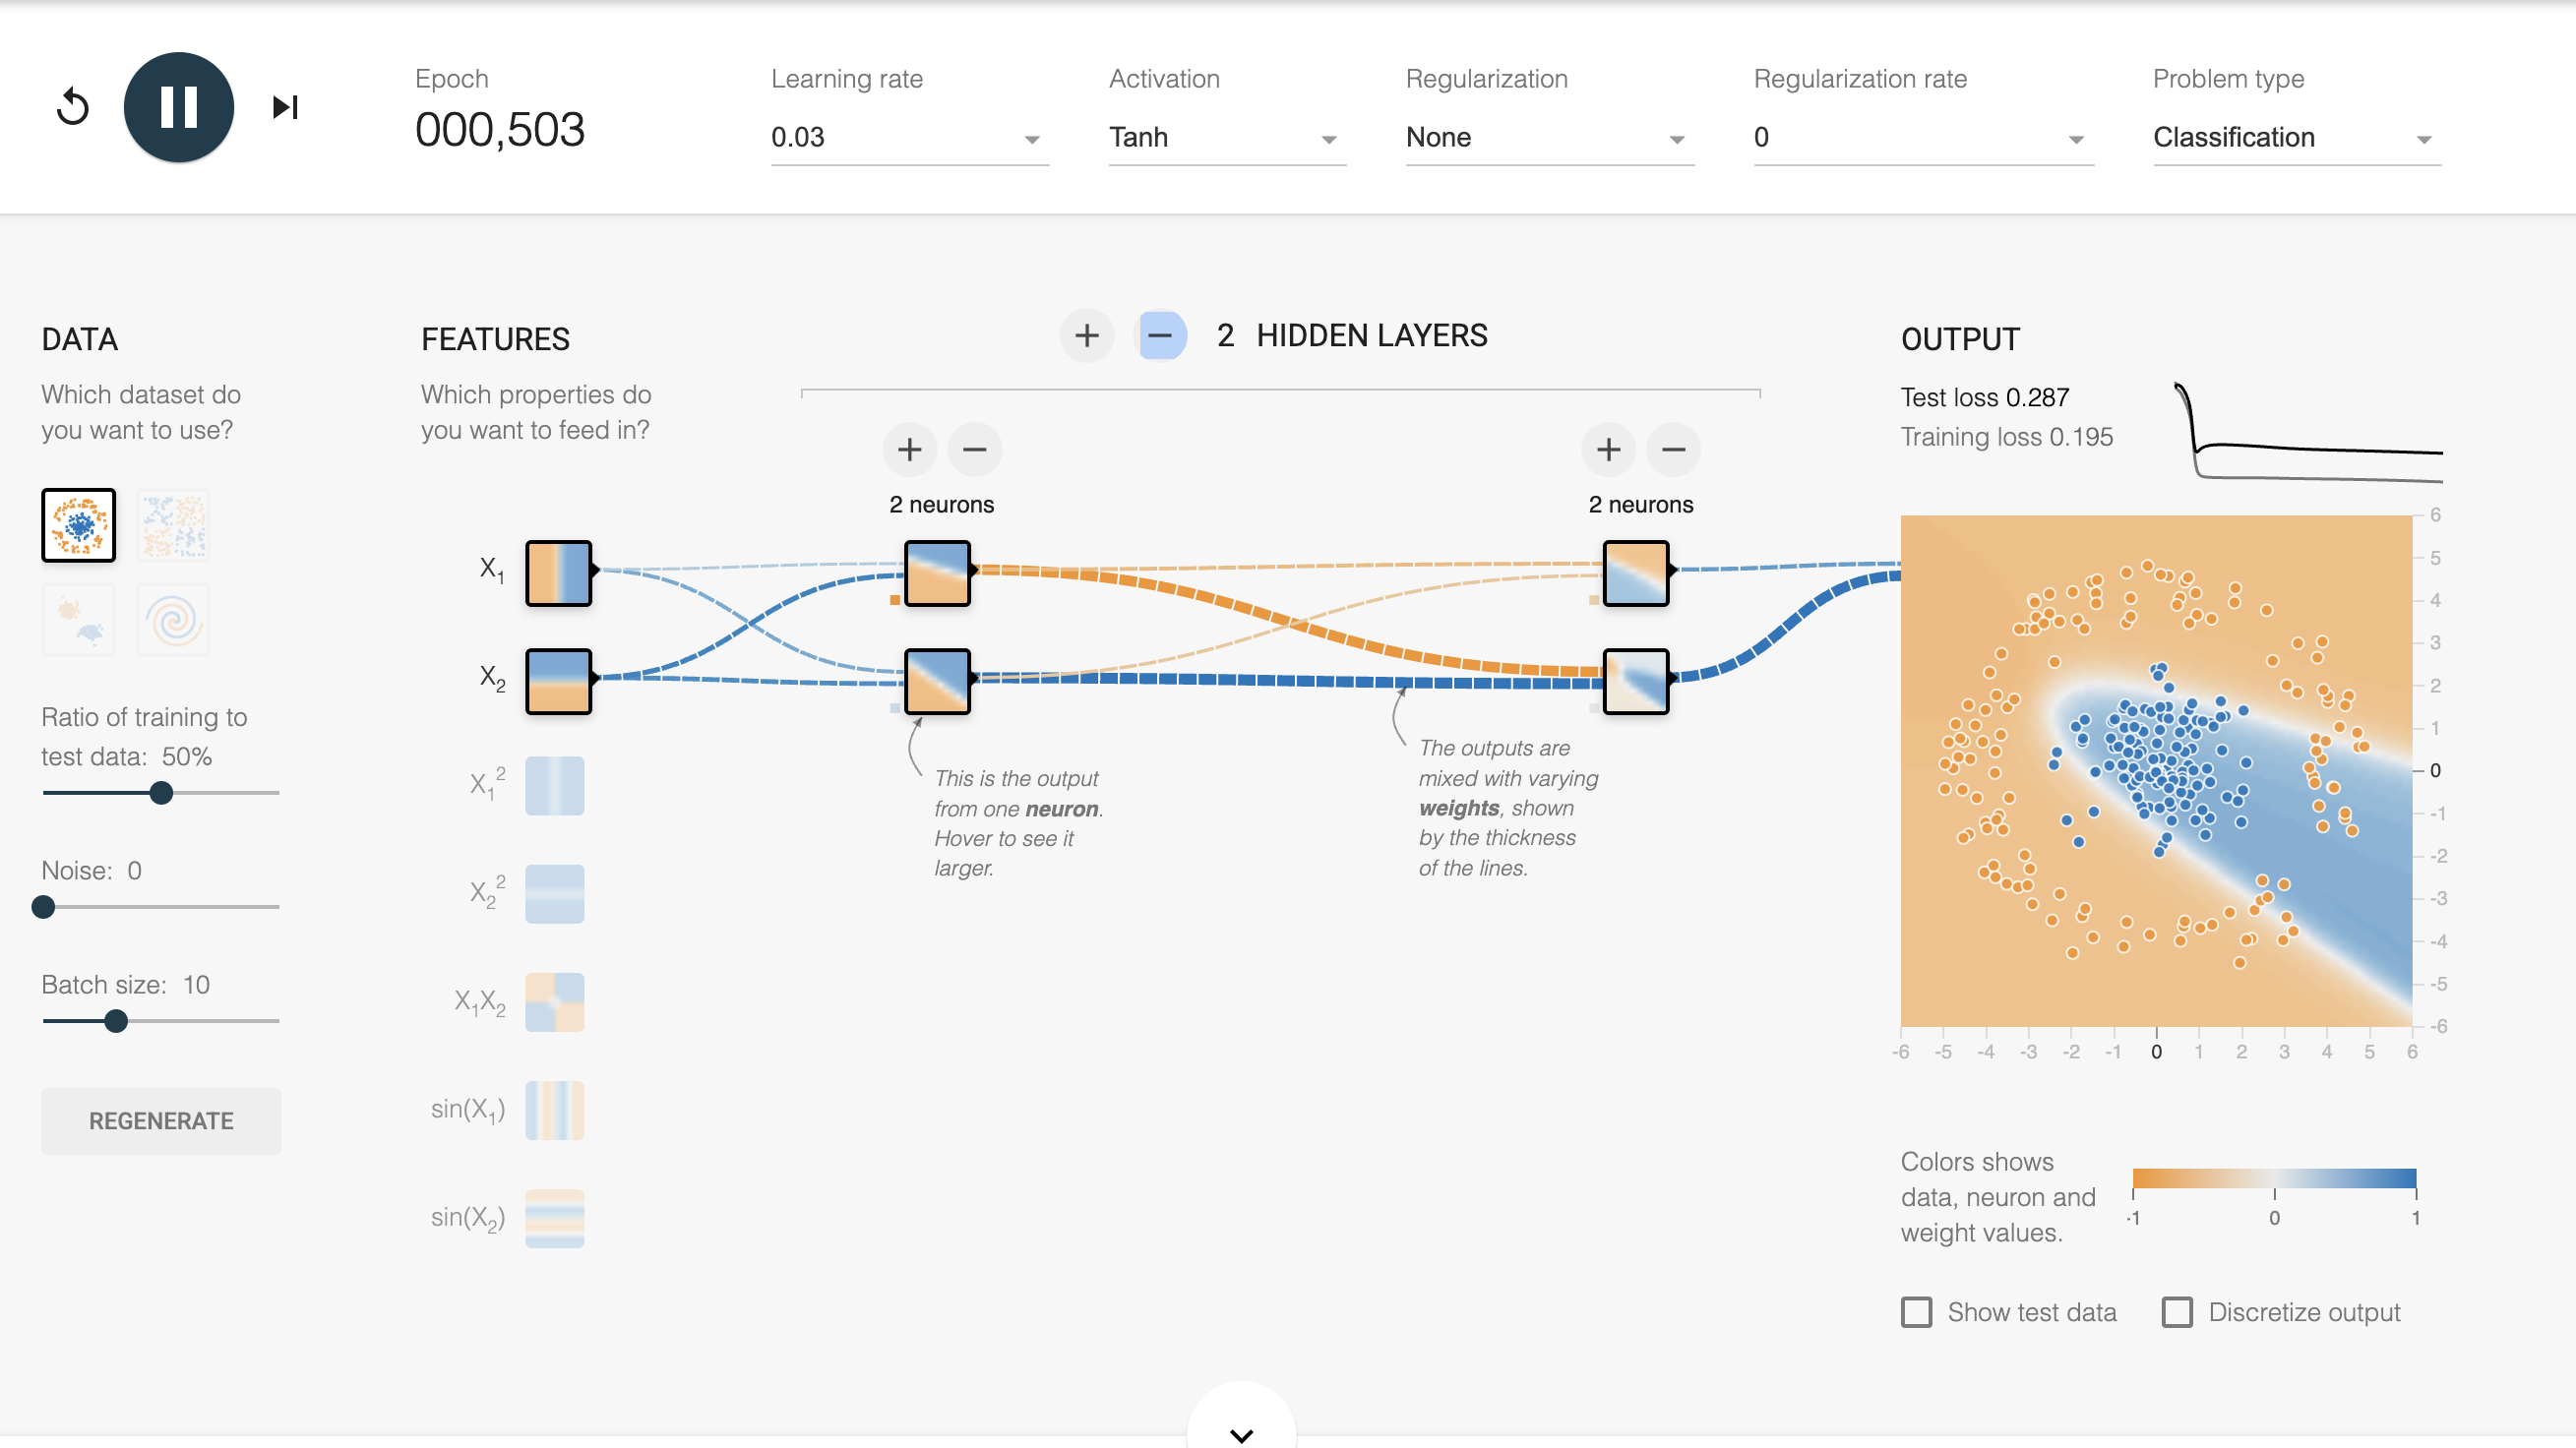

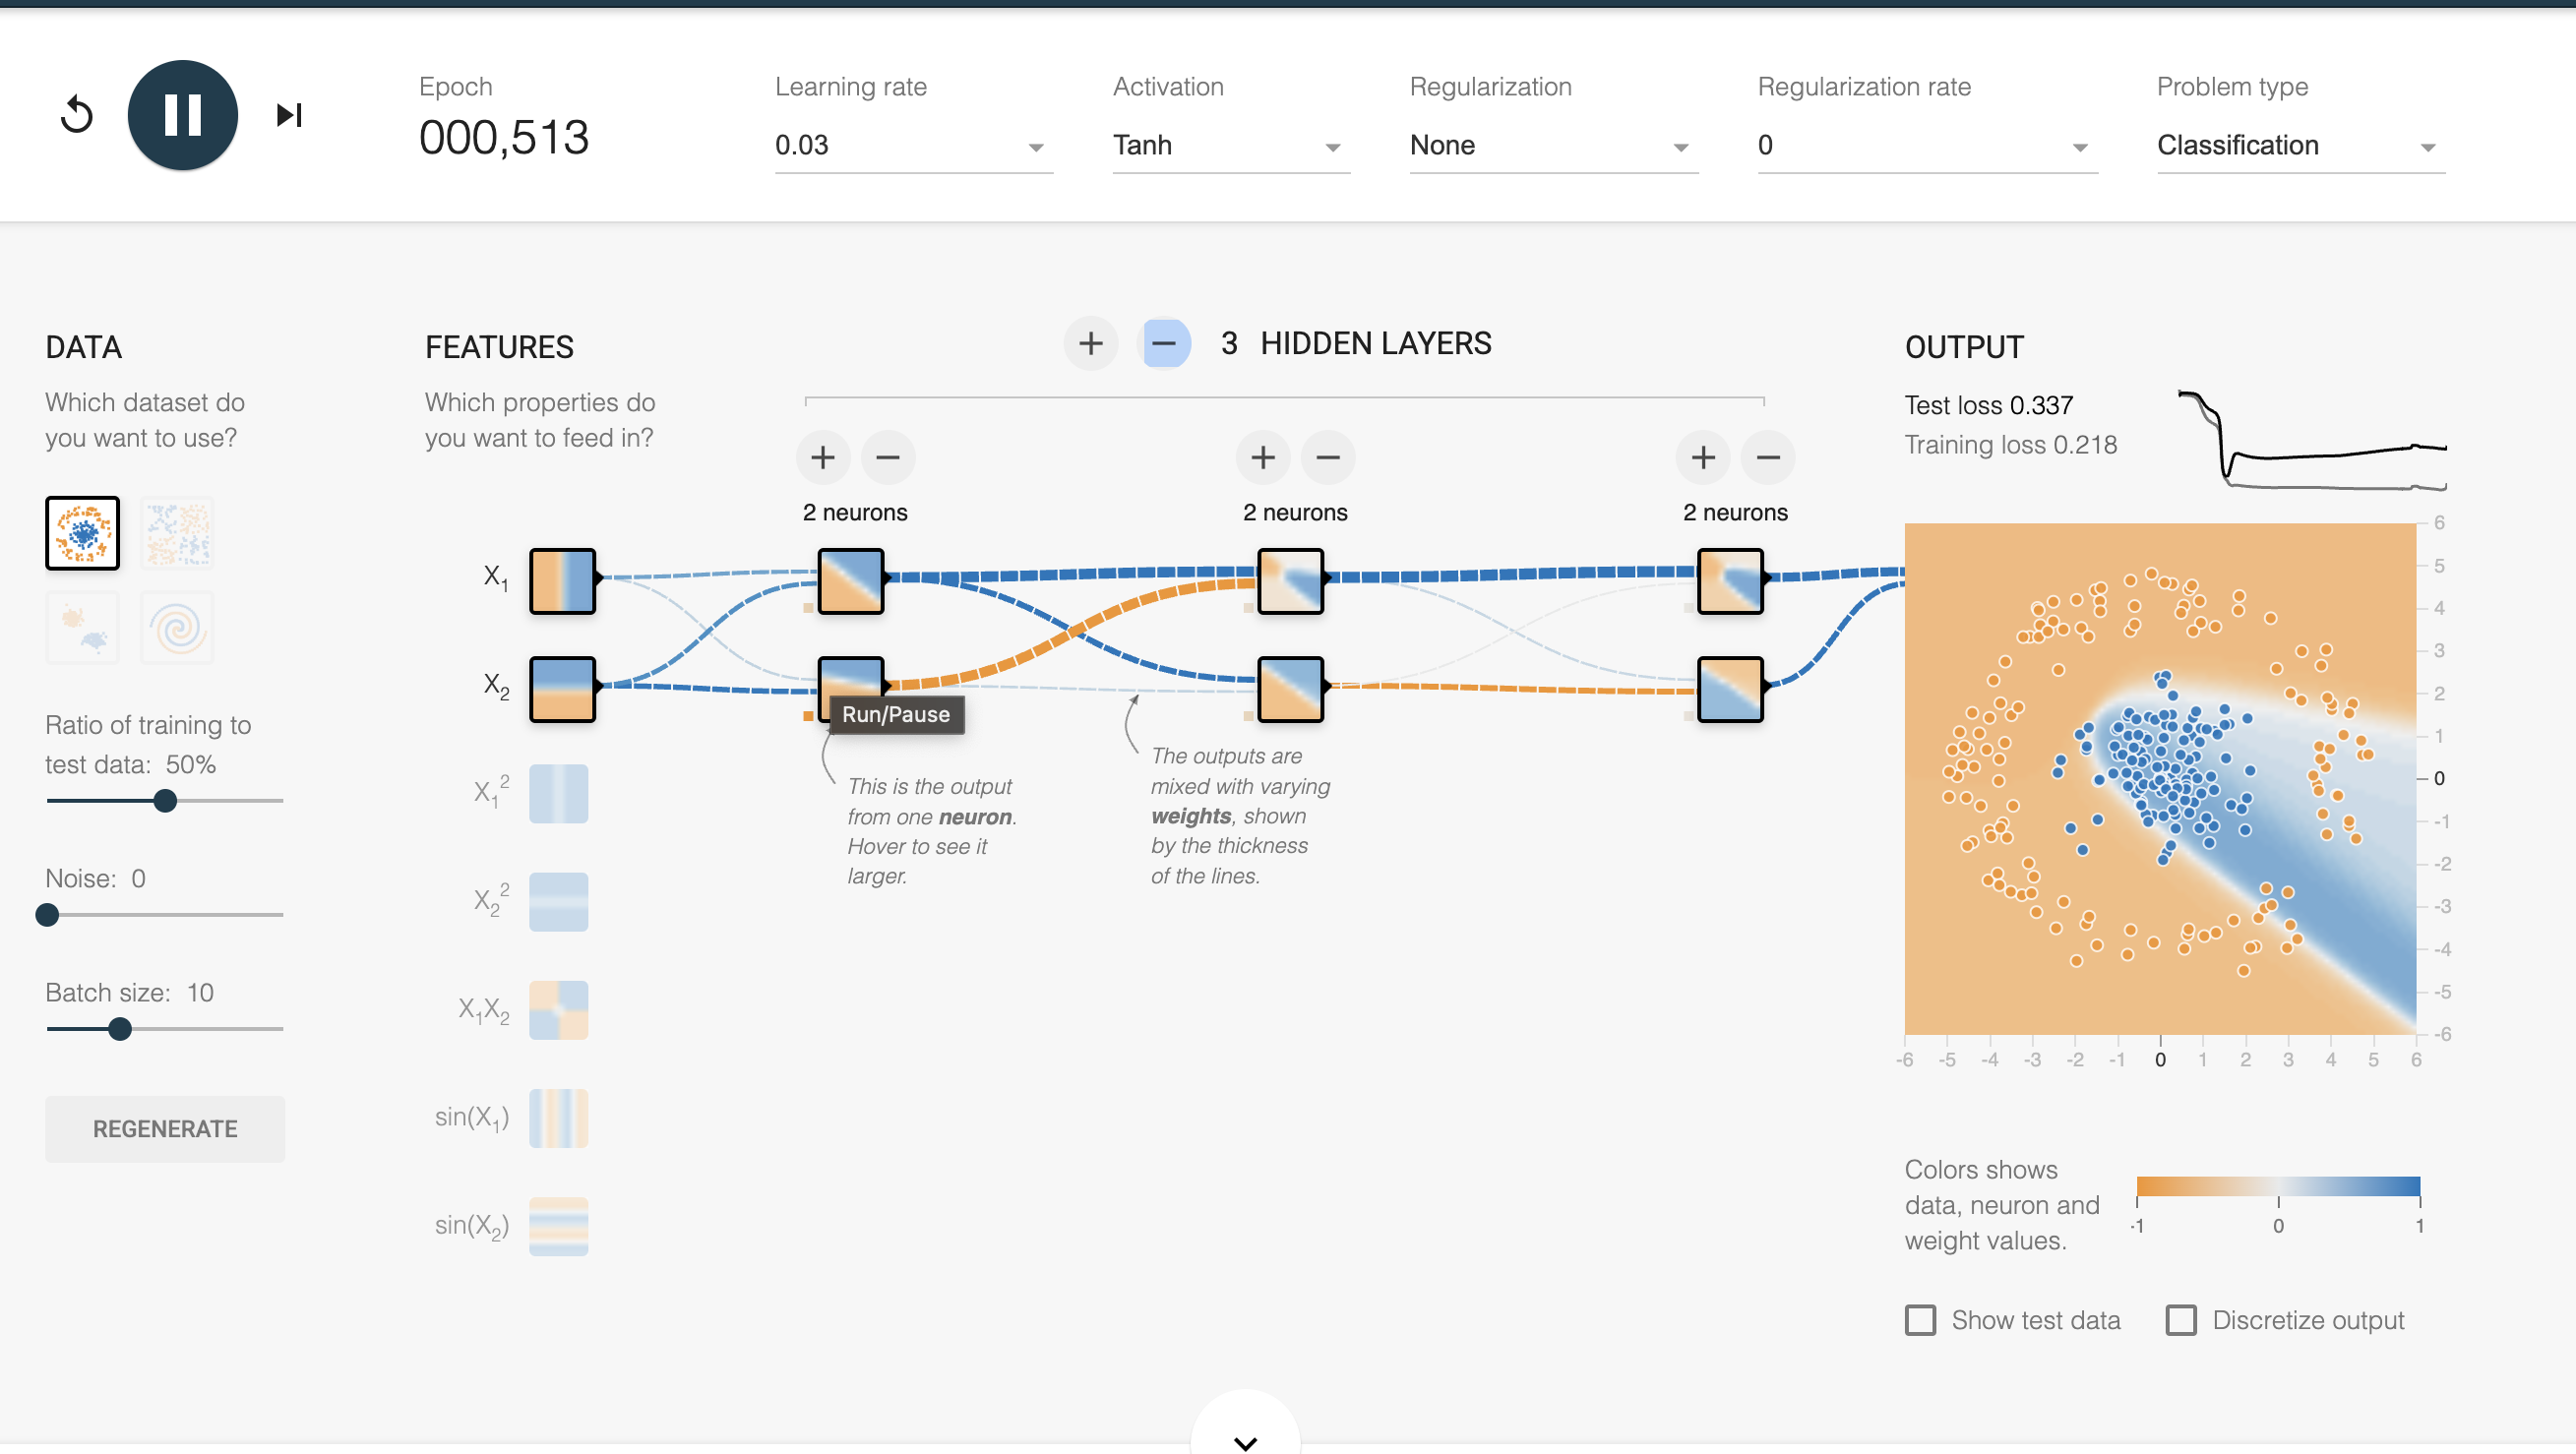

Podemos ver que a pesar de aumentar las capas internas, el resultado sigue sin ser el esperado. Sin embargo al aumentar las neuronas obtenemos nuevos resultados.

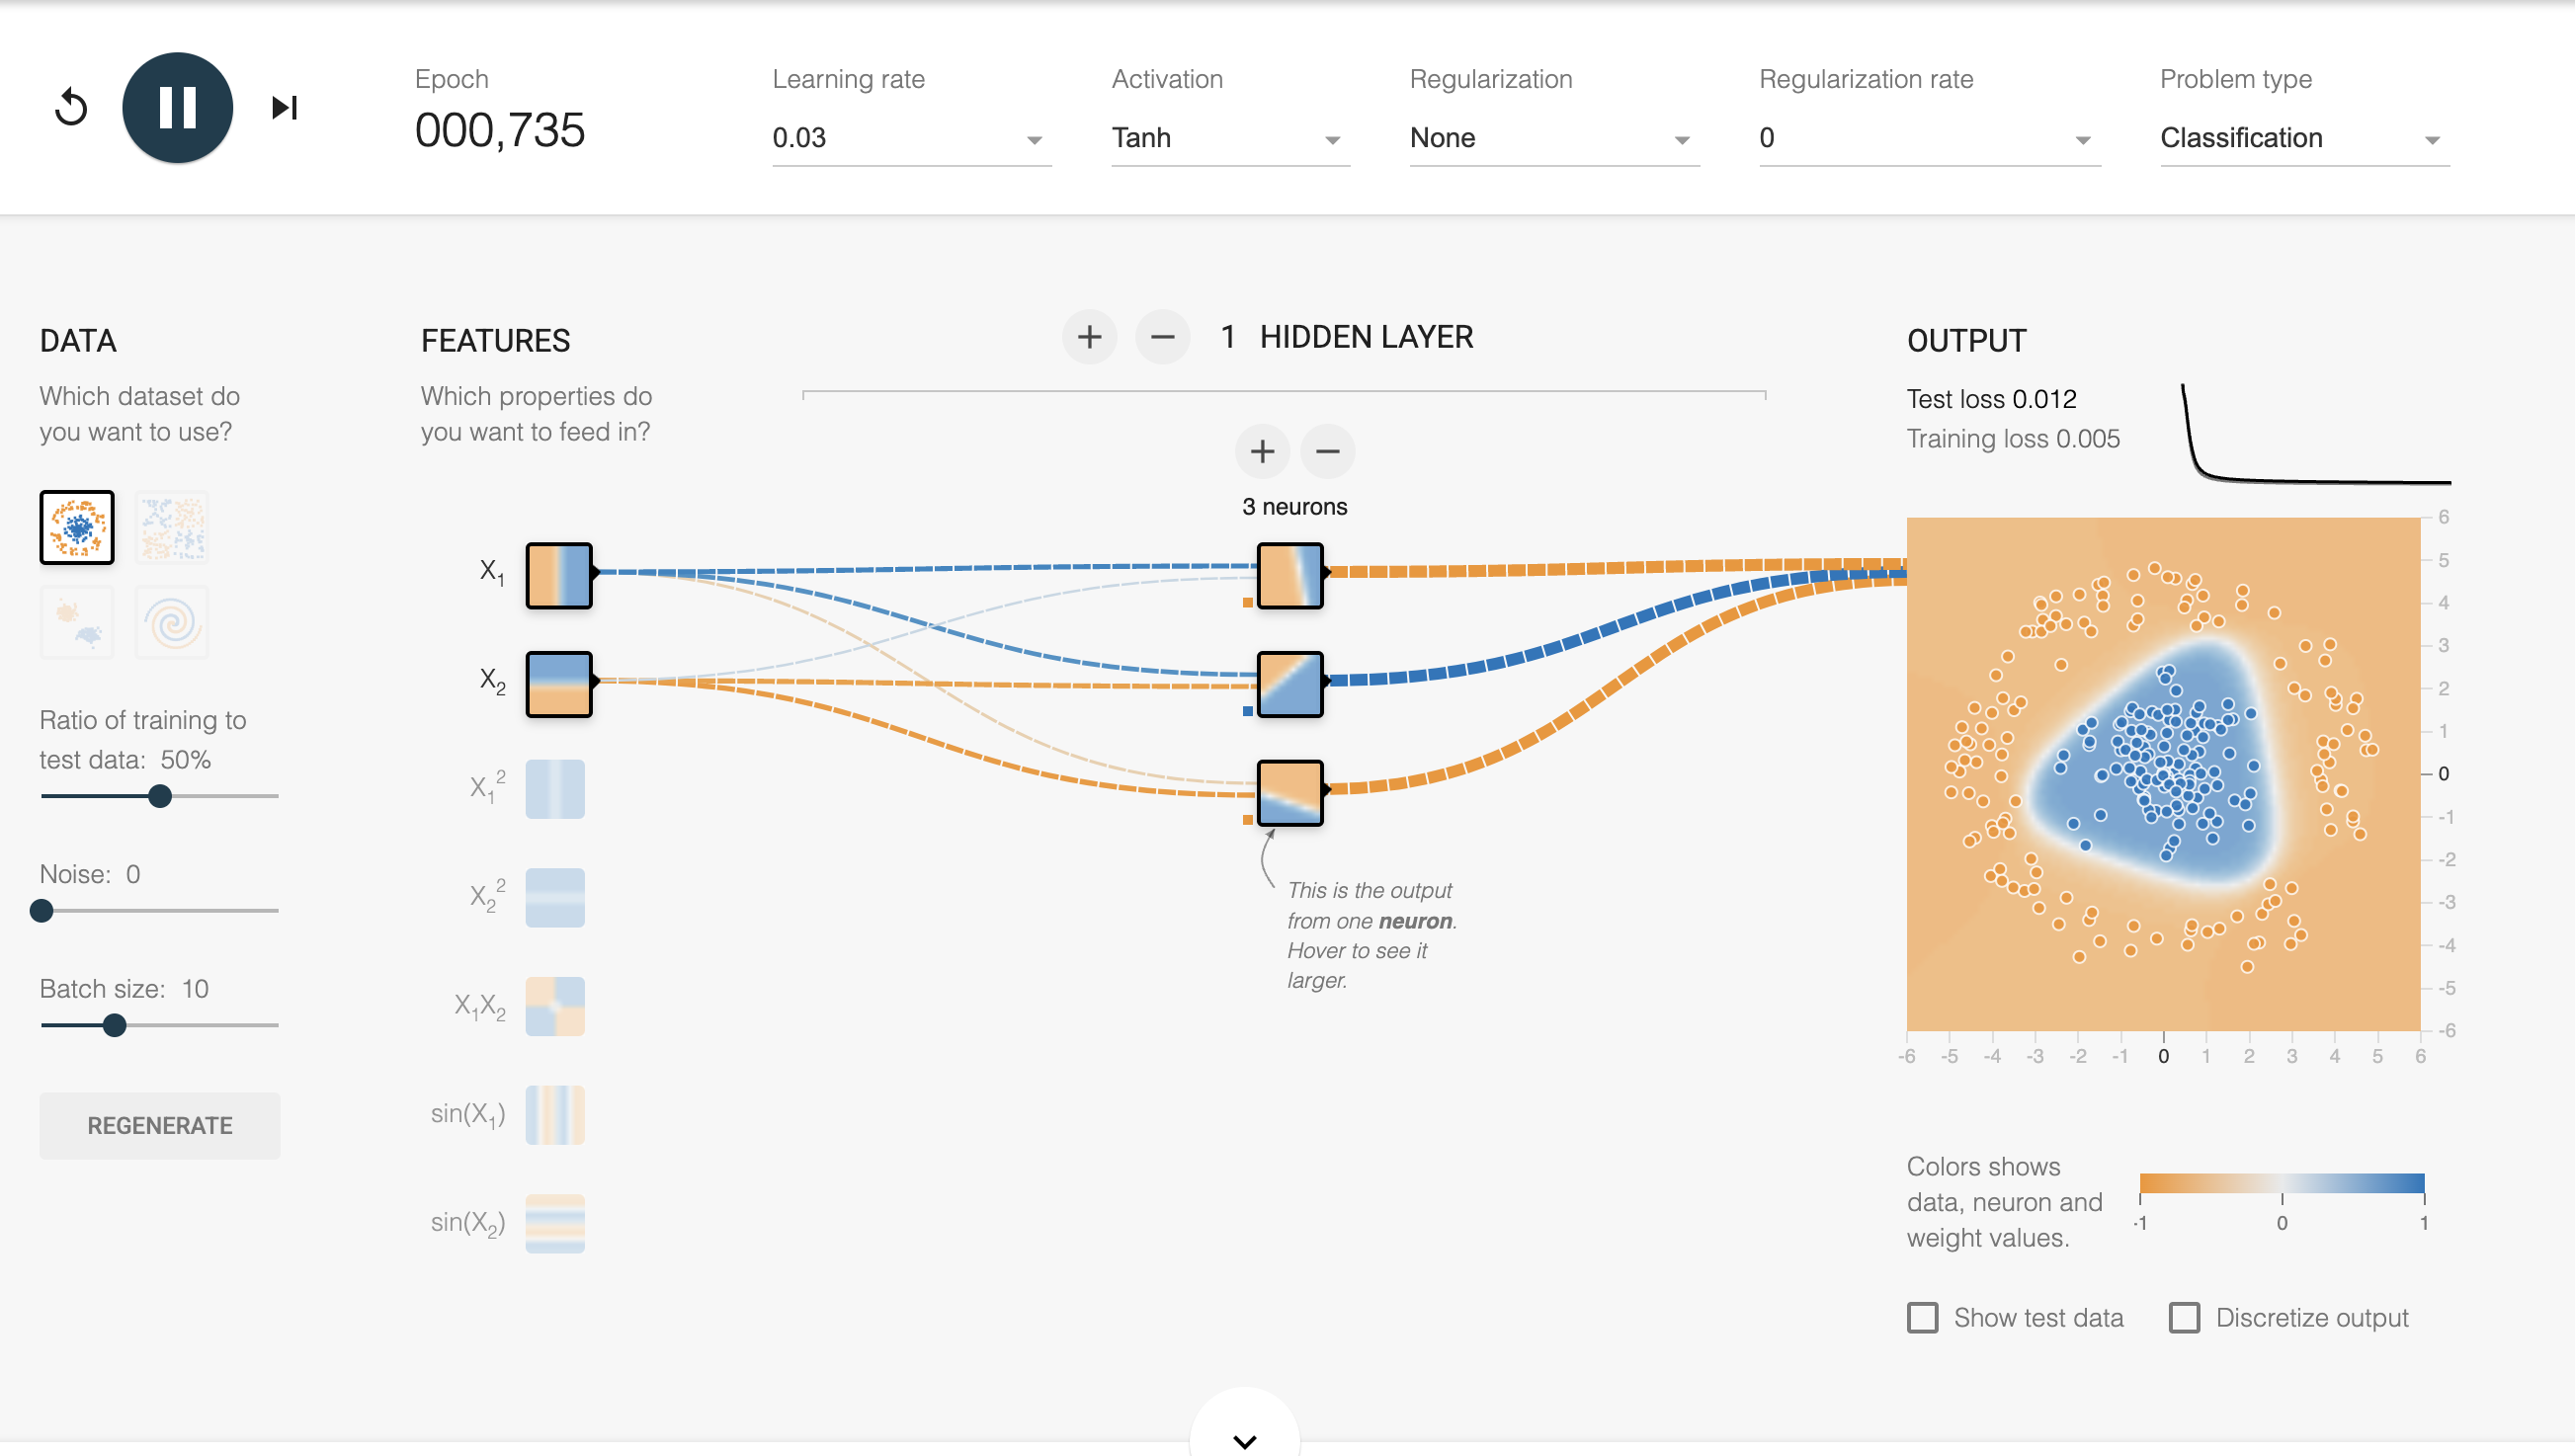

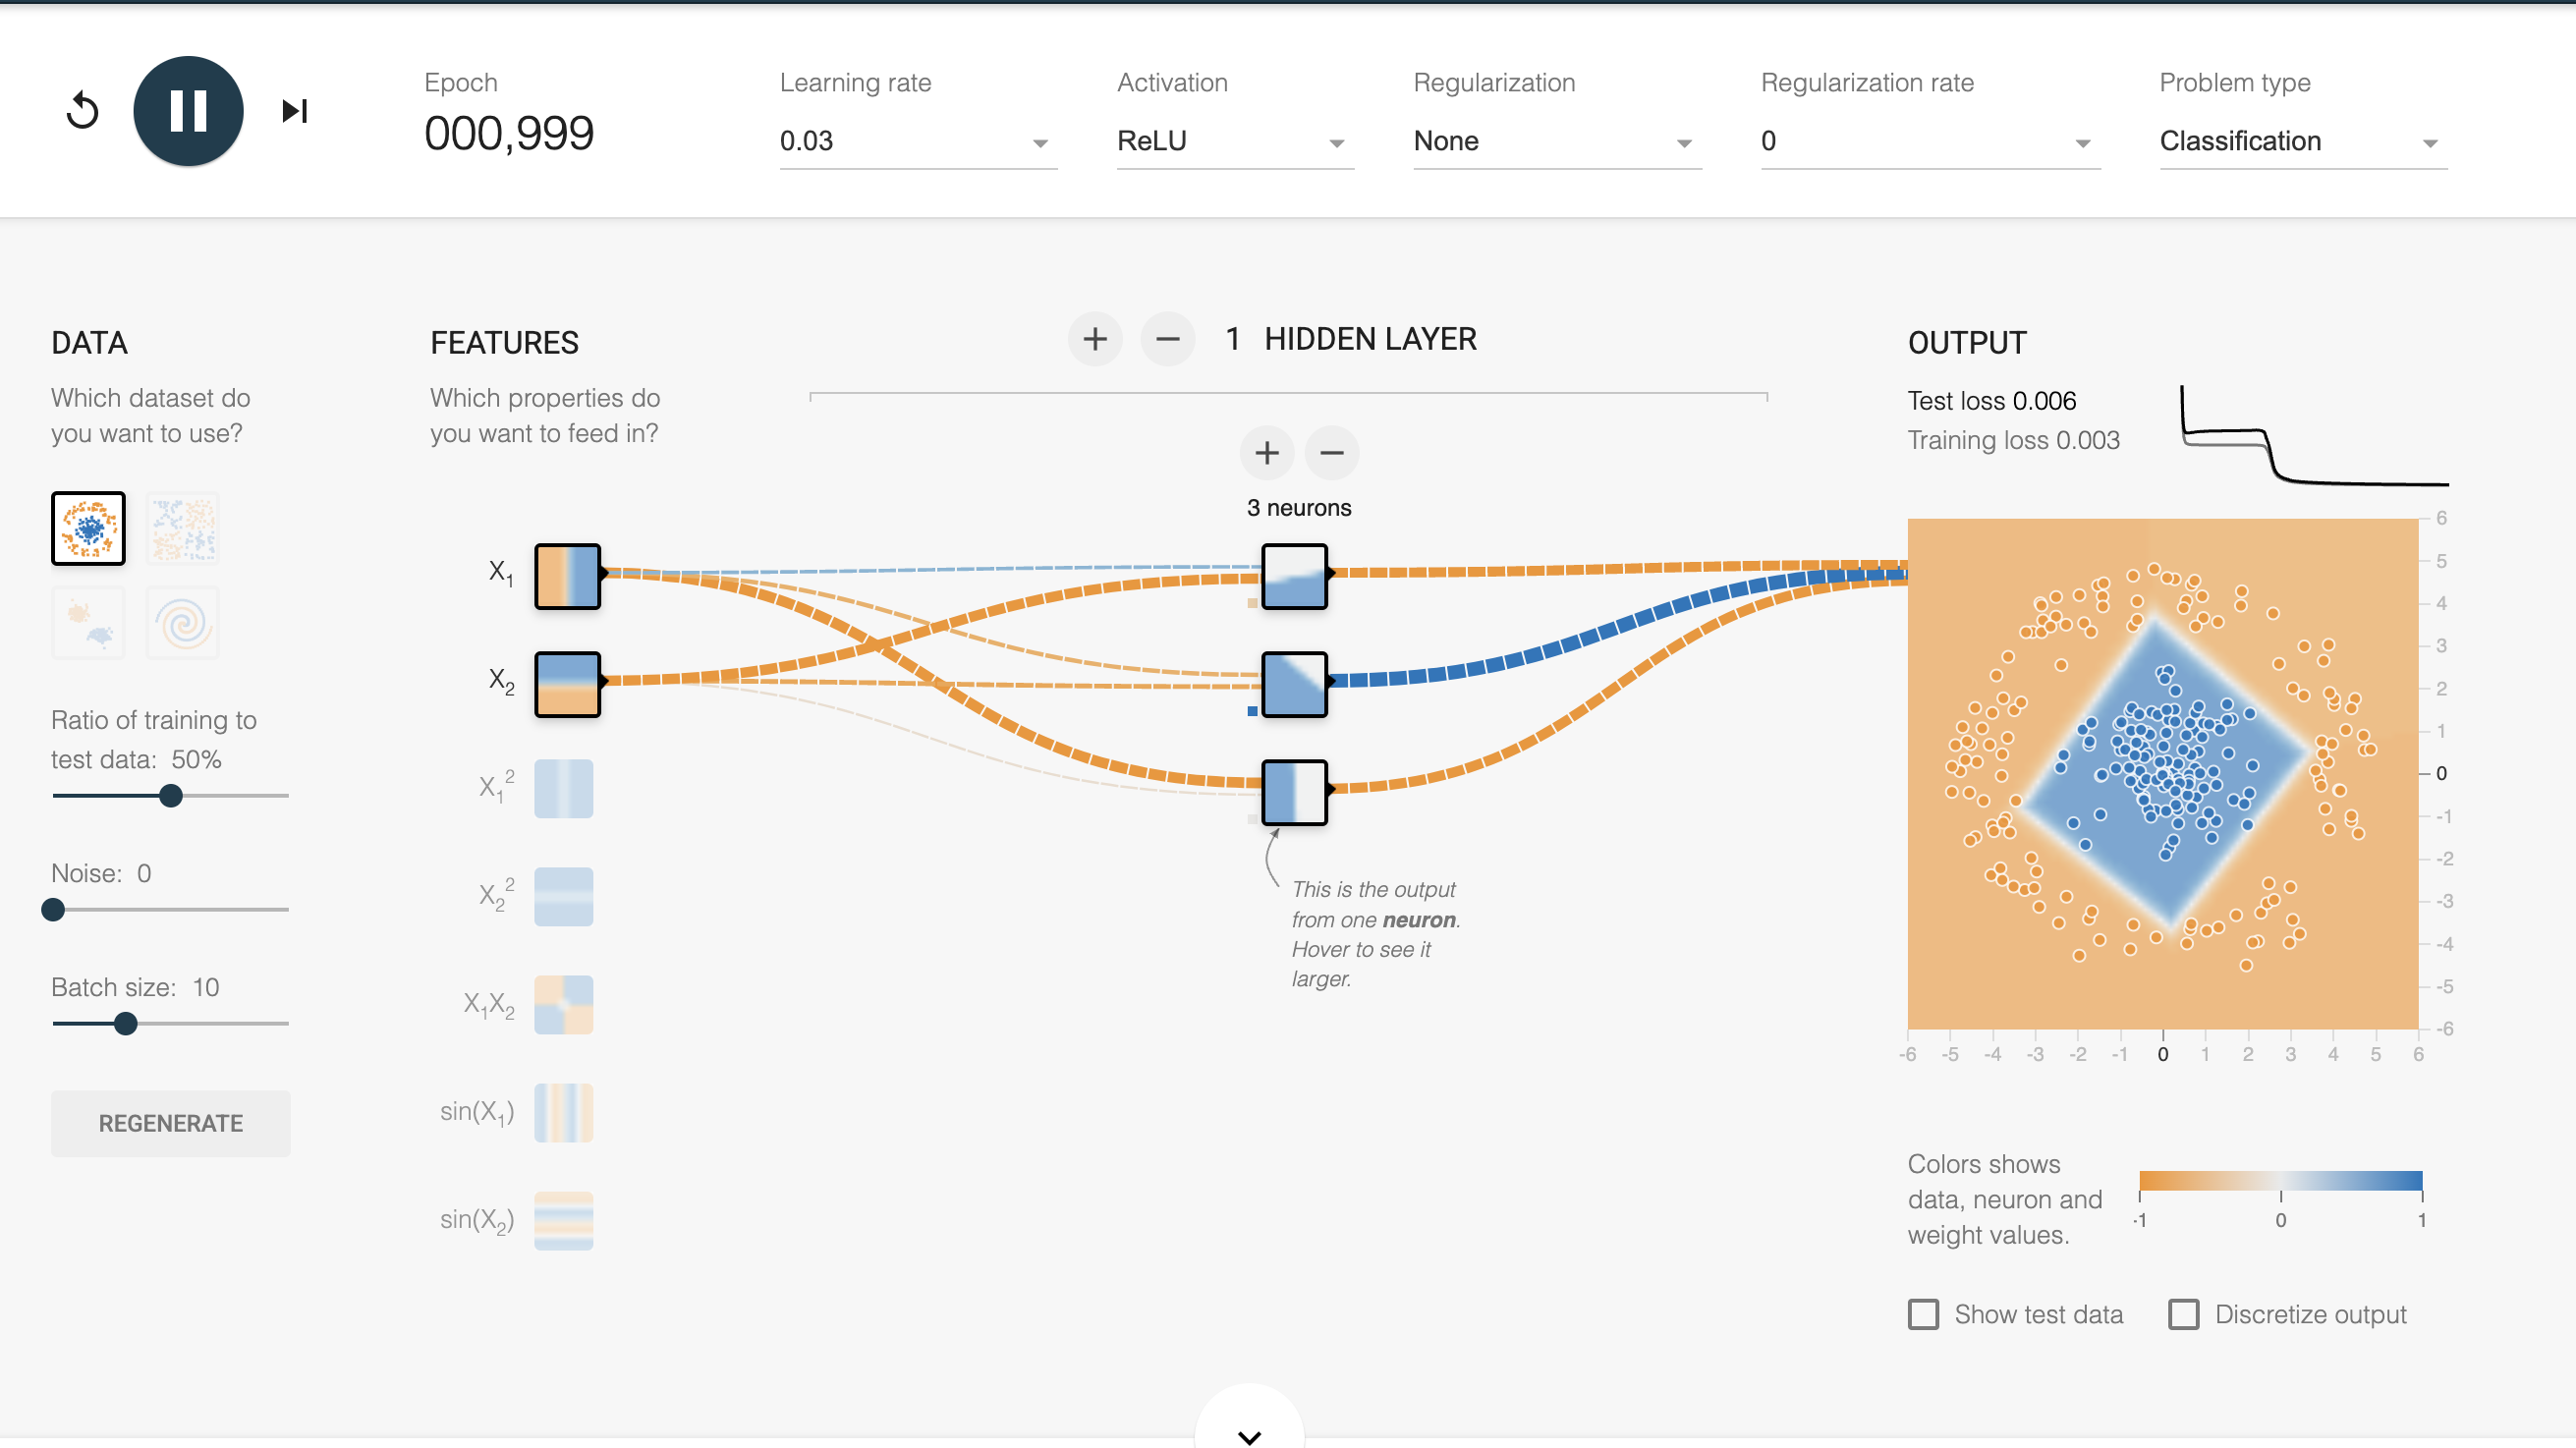

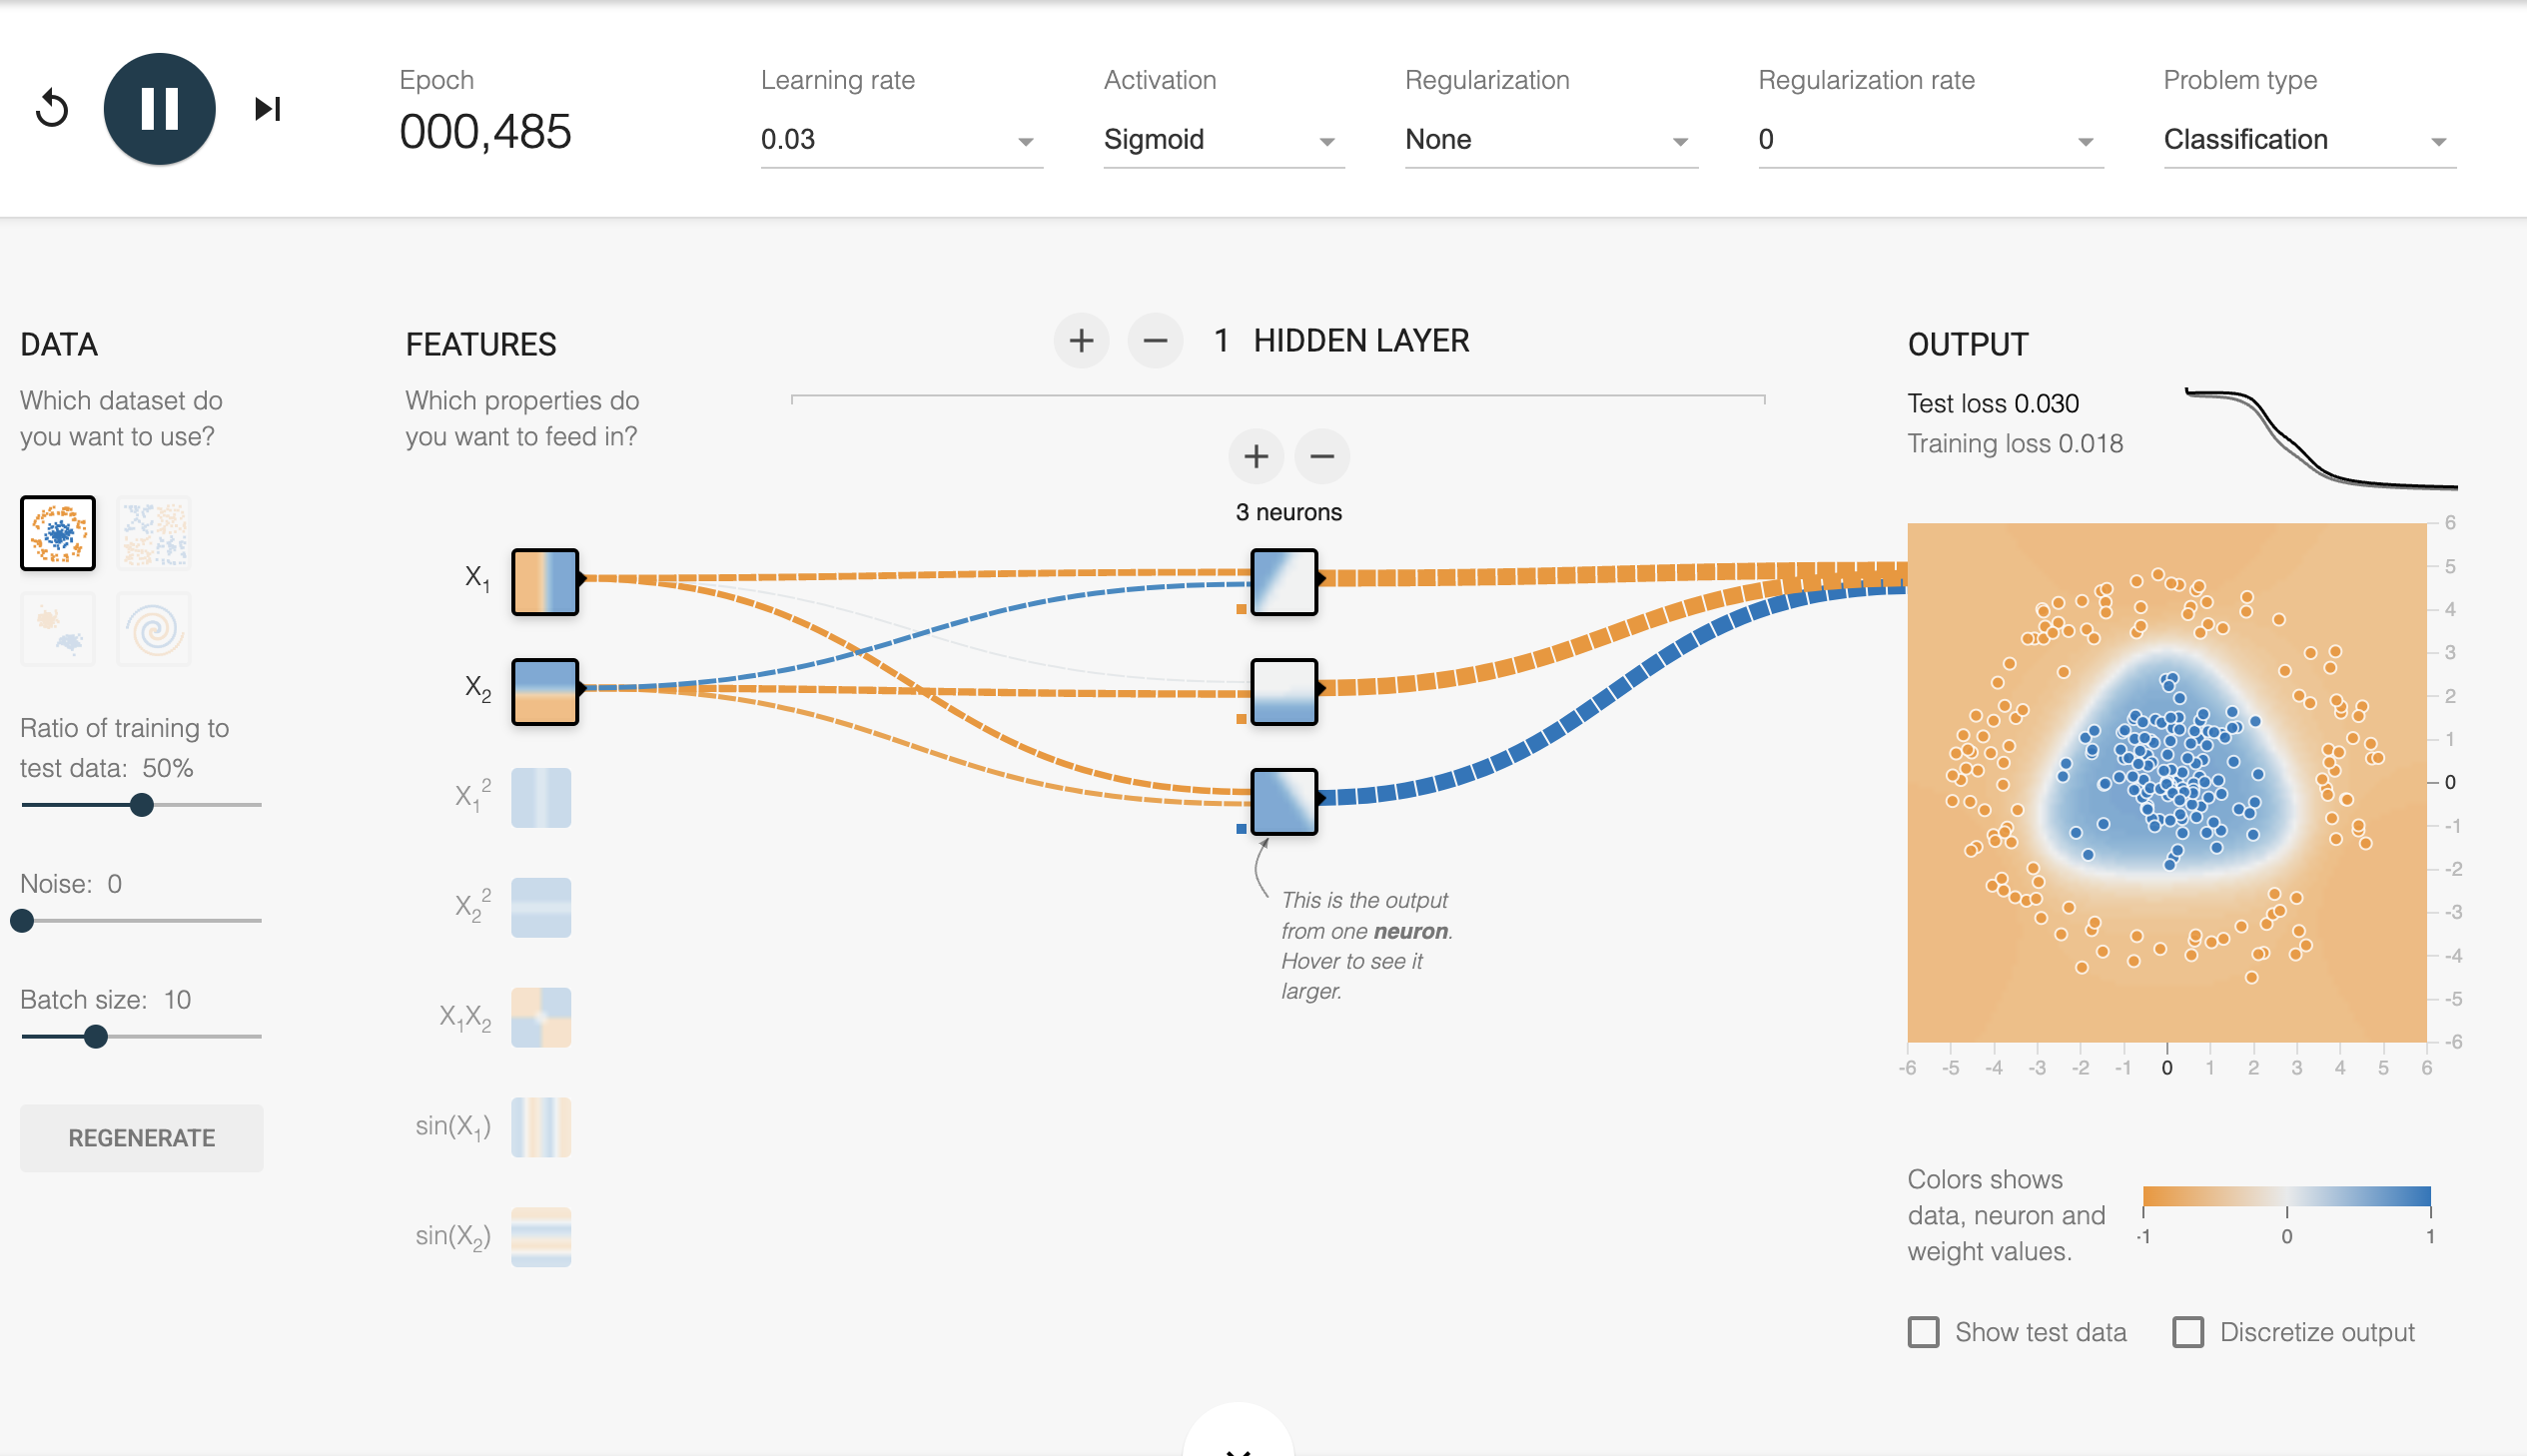

Ya sea usando el algoritmo de la tangente hiperbólica, sigmoide o incluso ReLU, obtenemos el resultado esperado únicamente con 1 capa interna pero eso sí, con un mínimo de 3 neuronas.

## c) 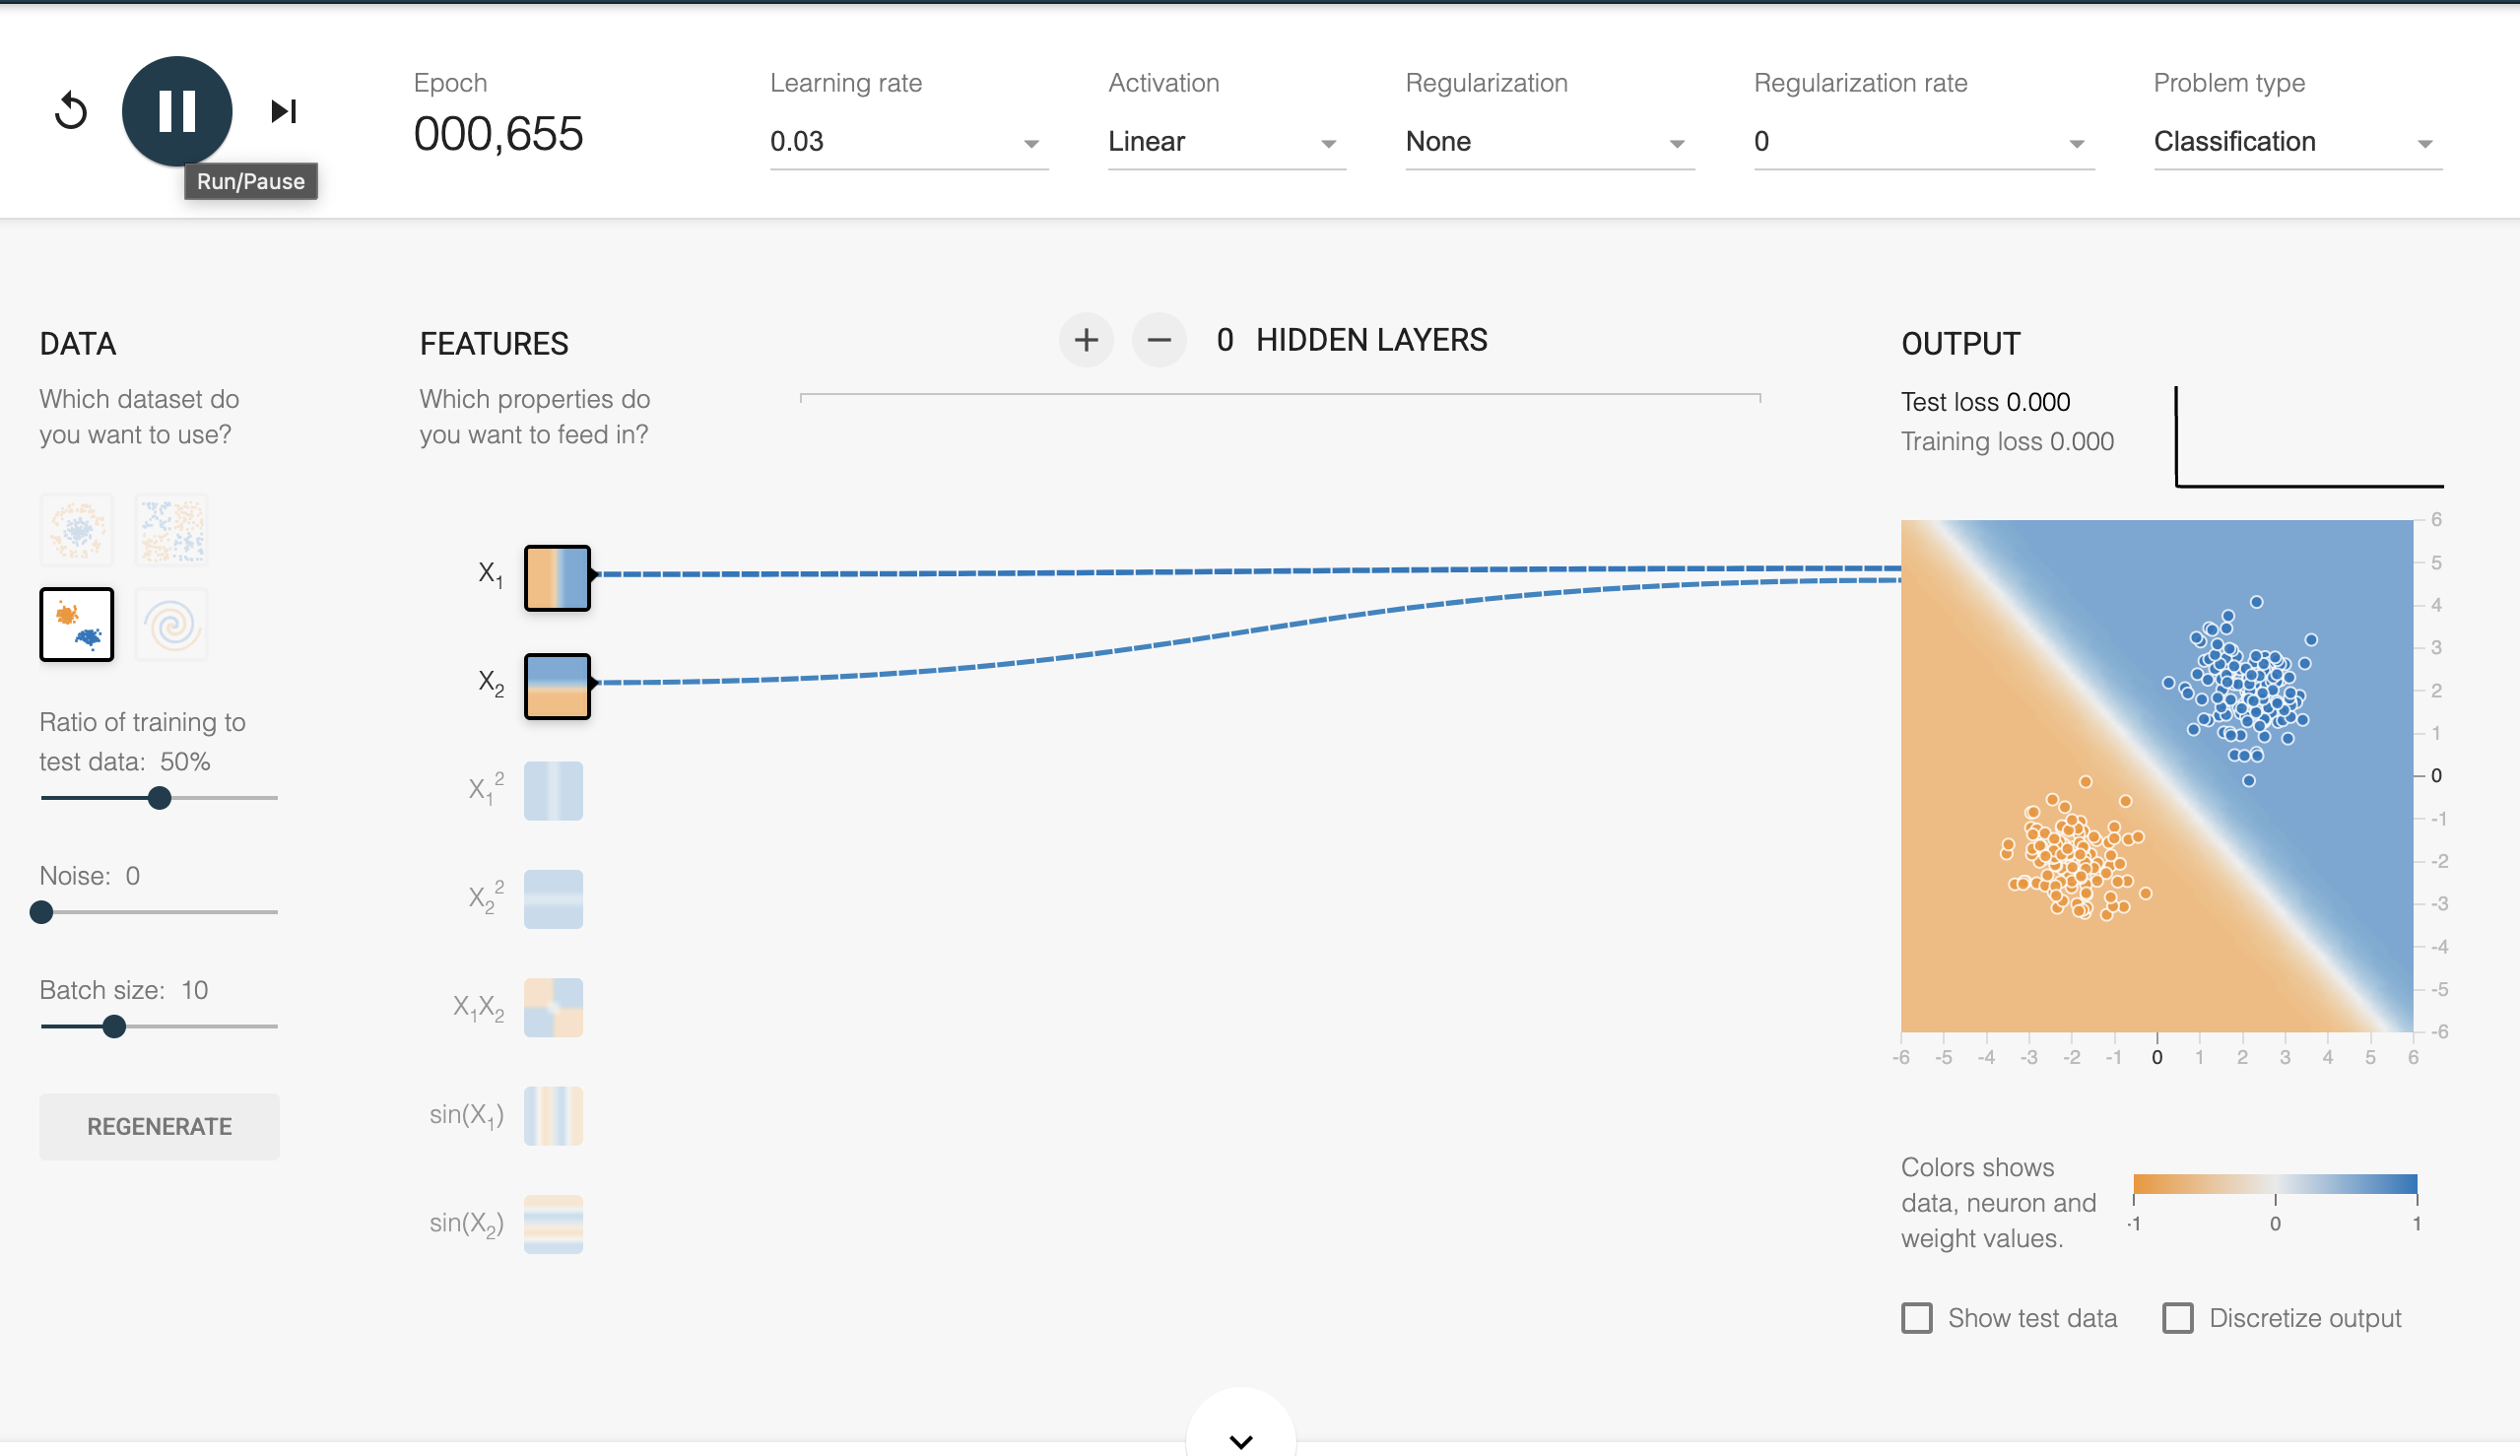

No, ninguna capa interna es necesaria para poder distinguir este conjunto de datos linealmente.

## d) 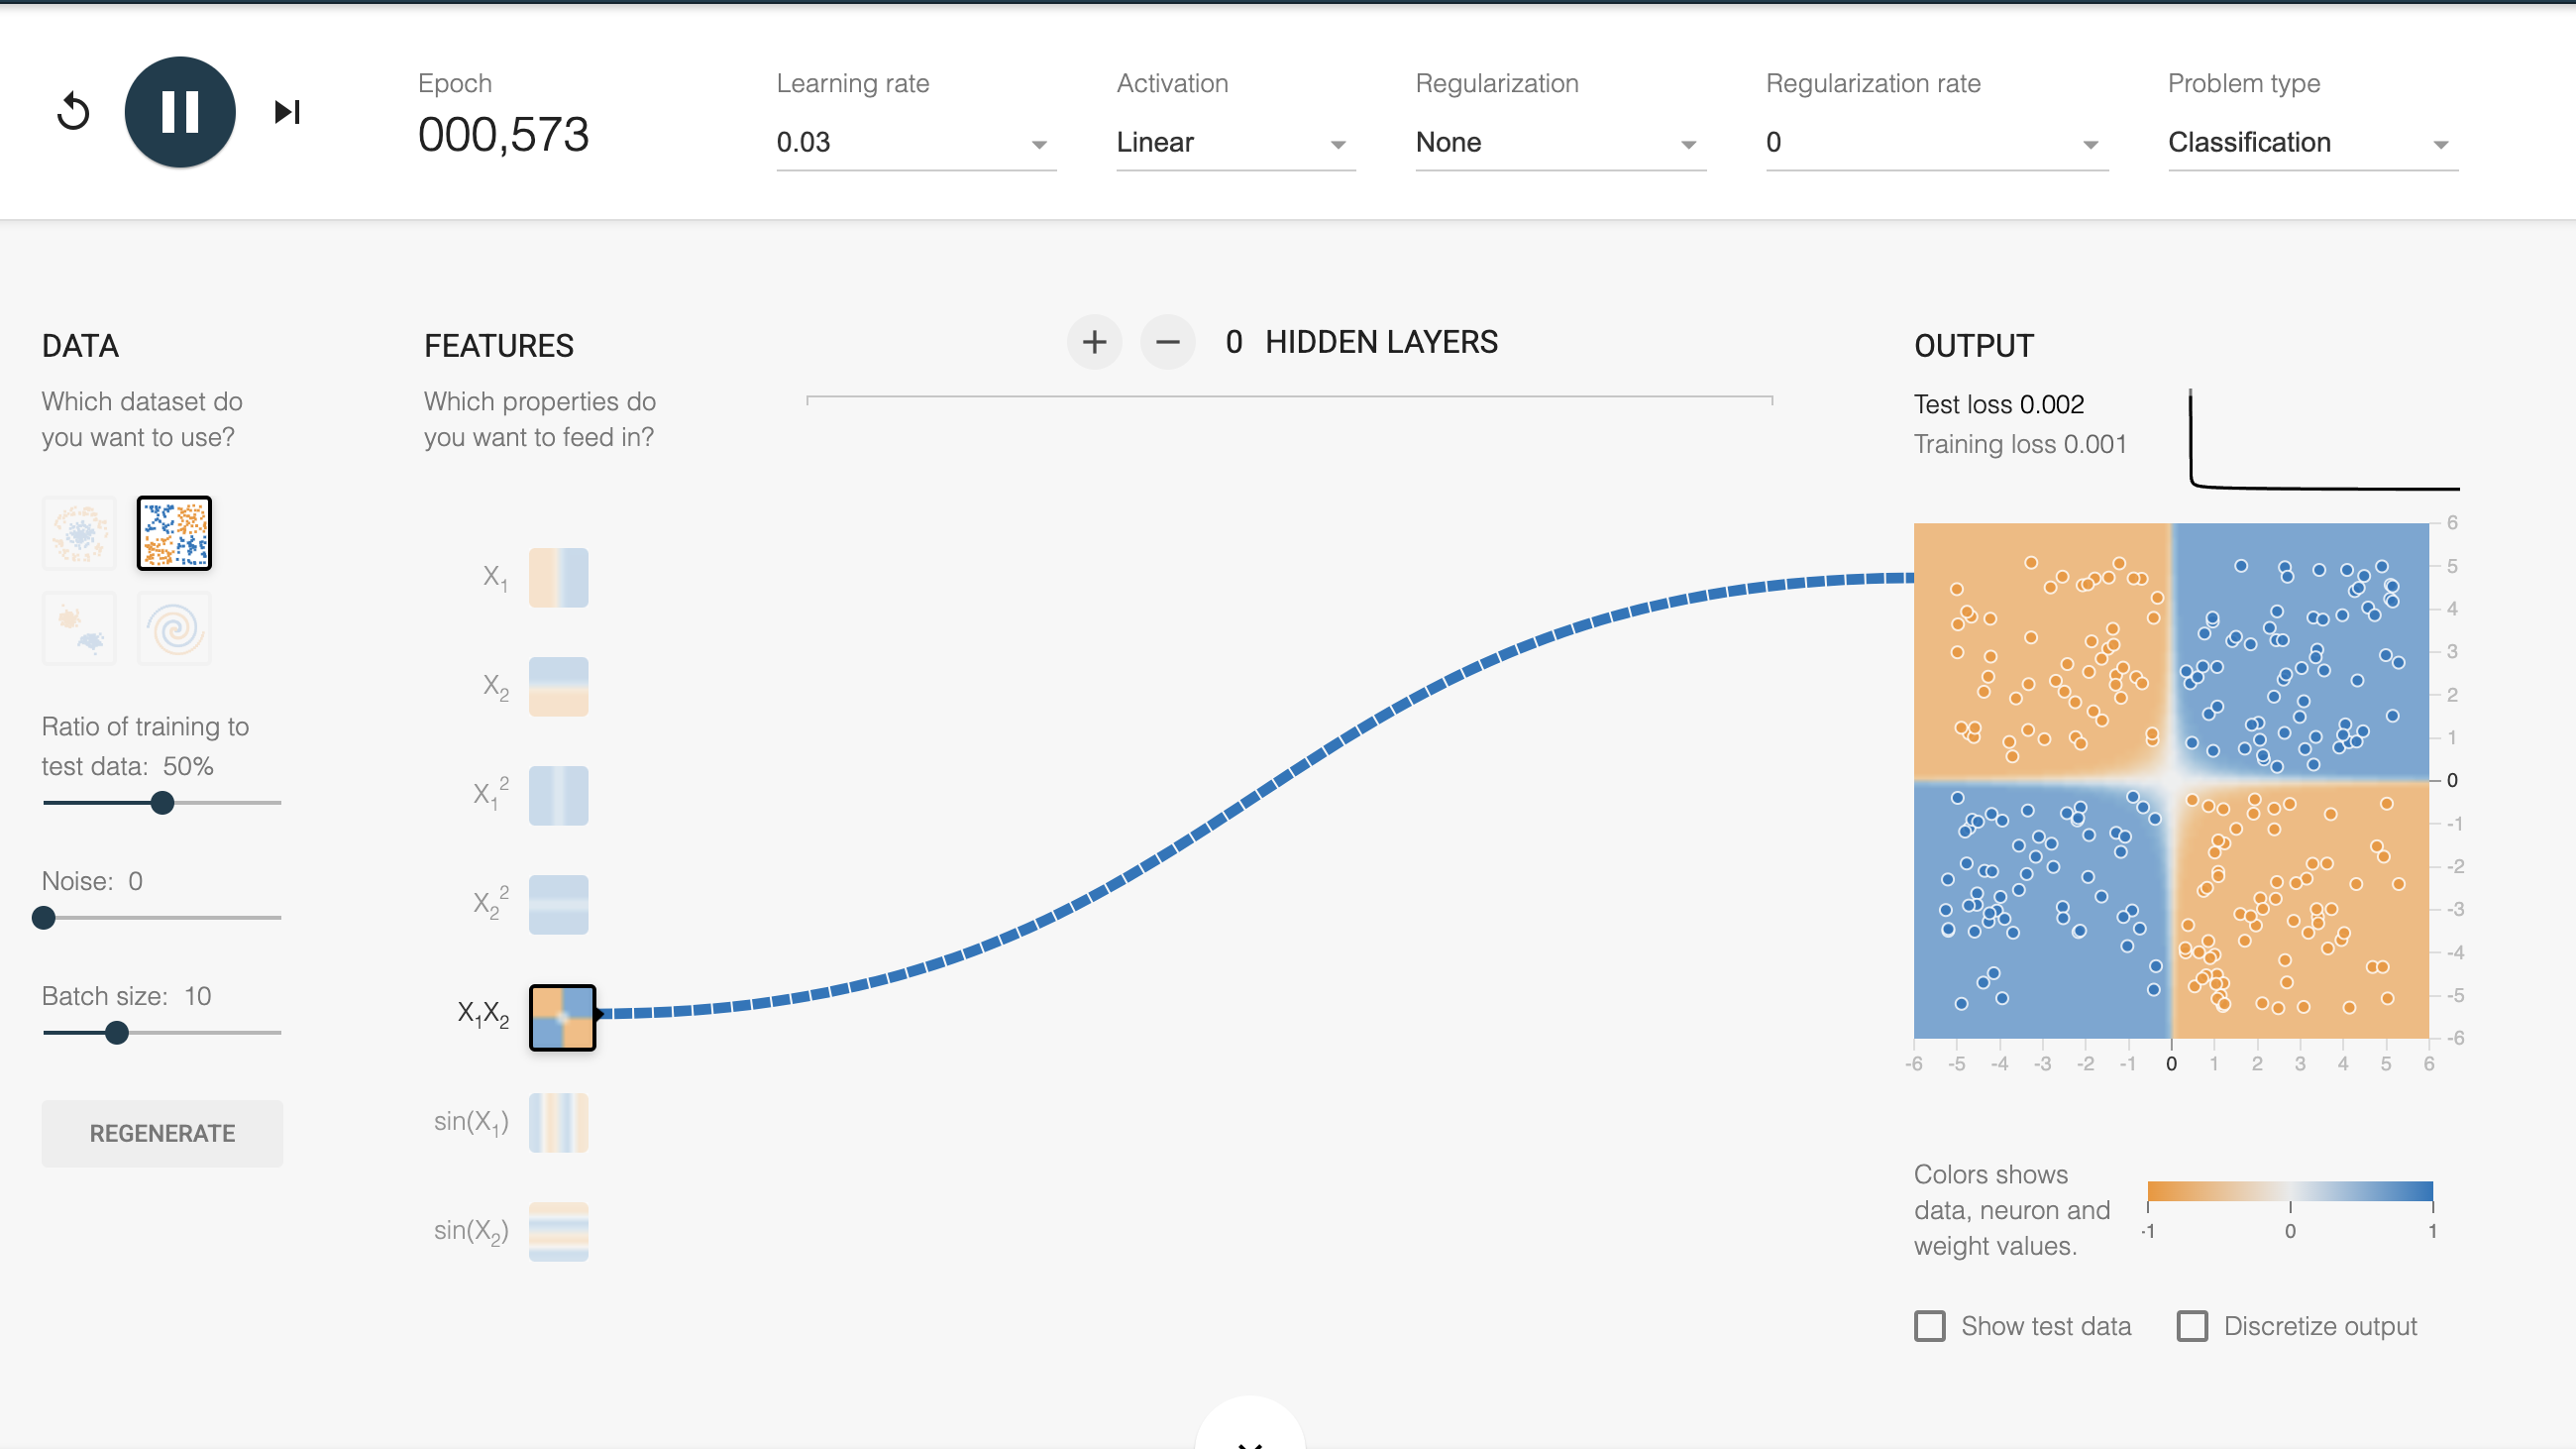

La única característica a modificar para conseguir separar los datos correspondientes a la función de XOR serían las ***features***.  
Pasando a usar ***x1,x2***, y con esta modificación conseguimos el resultado esperado sin añadir capas internas.

# 1. Millora de l'aplicació MNIST

Als apunts, hem aconseguit una precisió del 80% a la base de dades MNIST.

En aquesta pregunta, treballarem quatre aspectes del procés: modificarem la funció d'activació, afegirem una capa interna, canviarem l'optimitzador i finalment compararem els resultats amb els obtinguts abans.

a. Afegiu una capa intermèdia amb 100 neurones.

b. Usau la funció d'activació 'relu'.

c. Obteniu la mida del model (nombre de paràmetres entrenables). Justificau aquest valor en funció del nombre de neurones de cada capa.

d. Entrenau el model usant l'optimitzador Adam en comptes de SGD.

e. Comparau la precisió obtinguda amb el model sense modificar dels apunts.

In [ ]:
#Afegiu el vostre codi aquí, modificant el del quadern MNIST enllaçat des dels apunts
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


# 1. Precarga de los datos
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#2. Preprocesamiento de datos de entrada a una red neuronal
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000,784)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 3. Model definition
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10,activation='sigmoid',input_shape=(784,))) # Capa de entrada
model.add(tf.keras.layers.Dense(100, activation='relu')) # Añadir la capa oculta extra con 100 neuronas
model.add(tf.keras.layers.Dense(10,activation='softmax')) # Capa de salida

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │           1,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,960 (38.91 KB)

 Trainable params: 9,960 (38.91 KB)

 Non-trainable params: 0 (0.00 B)

•	La primera capa tiene 784 entradas (porque cada imagen es un vector de 784) y 10 neuronas, lo que da 784 * 10 + 10 (pesos + sesgos). Usando activación "sigmoid".  
•	La capa intermedia tiene 10 entradas y 100 neuronas, lo que da 10 * 100 + 100. Usando activación "ReLu".  
•	La capa de salida tiene 100 entradas y 10 neuronas, lo que da 100 * 10 + 10. Usando activación "softmax".  

El resultado es que el número total de parámetros entrenables es **9060**.

### d) Optimizar modelo usanod Adam en lugar de SGD

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9439 - loss: 0.1947
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9450 - loss: 0.1855
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9485 - loss: 0.1724
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9496 - loss: 0.1681
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9512 - loss: 0.1629
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9302 - loss: 0.2309
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


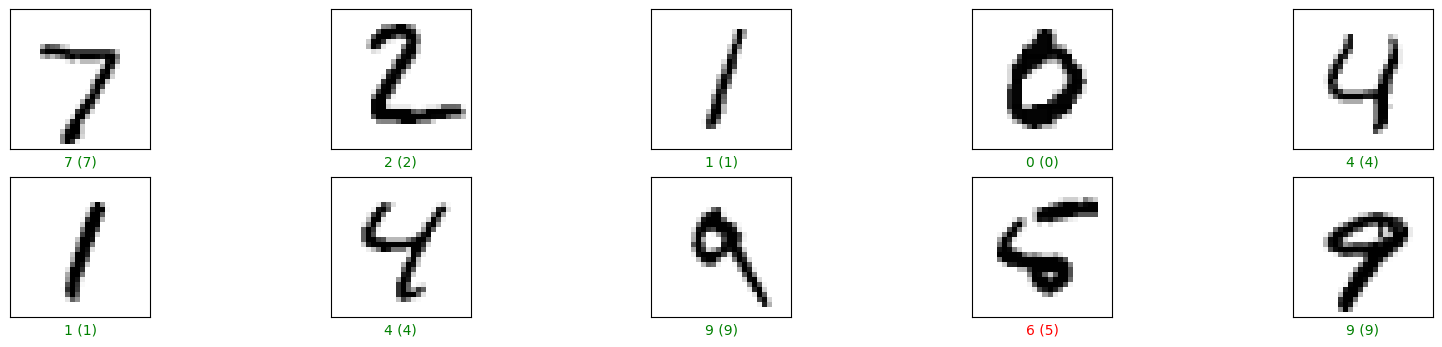

In [ ]:
# 4. Configuración del aprendizaje
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# 5. Entrenamiento del modelo
model.fit(x_train, y_train, epochs=5)

# 6. Evaluación del modelo
test_loss, test_acc = model.evaluate(x_test, y_test)

# 7. Generación de predicciones
predictions = model.predict(x_test)

# Mostrar las primeras 10 imágenes del conjunto de prueba, con sus etiquetas predichas y verdaderas
num_rows, num_cols = 2, 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
	plt.subplot(num_rows, num_cols, i + 1)
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])
	plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
	predicted_label = predictions[i].argmax()
	true_label = y_test[i].argmax()
	color = 'green' if predicted_label == true_label else 'red'
	plt.xlabel(f"{predicted_label} ({true_label})", color=color)
plt.show()

En estos resultados, el modelo ha logrado casi un 100% de acierto. En cuanto a la precisión, vemos que alcanzó el 93%, lo que representa una mejora notable en comparación con el ejemplo usando SGD y sin la capa intermedia de 100 neuronas, ya que hemos obtenido una mejora de casi un 10%.

Esto demuestra que el optimizador Adam, al ser adaptativo, ajusta de manera más eficiente los pesos del modelo, lo que permite que el modelo aprenda de forma más precisa y logre mejores resultados en la clasificación.

# 2. Replicació d'un experiment

Stephen Wolfram publicà un [article llarg](https://writings.stephenwolfram.com/2023/02/what-is-chatgpt-doing-and-why-does-it-work/) en què explica molts de conceptes d'aprenentatge automàtic. El podeu llegir complet; hi trobareu conceptes que ja coneixeu i d'altres que encara no.

En aquest exercici treballarem la xarxa neuronal que proposa per mirar de replicar l'experiment descrit i comprovar si obtenim resultats semblants.

Aproximarem la següent funció.
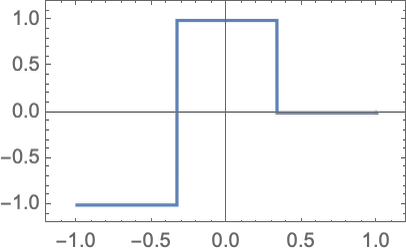


I utilitzarem aquesta arquitectura.

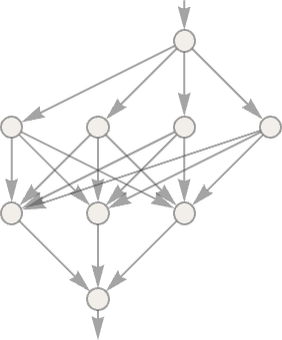

a. Calculau quants de paràmetres té la xarxa obtinguda, detallant quants de pesos i quants de biaixos hi ha en cada capa i en total. Teniu en compte que cada neurona té tants de pesos com fletxes hi entren i un biaix addicional.

b. Definiu la xarxa neuronal de la imatge usant Keras. Utilitzau la funció d'activació ReLU a les capes internes i la funció d'activació lineal a la darrera capa d'una sola neurona, ja que es tracta d'una aplicació de **regressió**.

c. Obteniu el resum de la vostra xarxa amb el mètode corresponent i comprovau que coincideix amb el que heu calculat a l'apartat a.

d. Generau un conjunt de dades adequat per entrenar la xarxa i obtenir una bona aproximació a la funció desitjada. Considerau un rang de valors d'$x$ entre $-5$ i $5$ i valors d'$y$ d'acord amb la funció de tres regions constants indicada. En aquest cas, els valors d'$x$ tant poden ser aleatoris com distribuïts equitativament, no ha de canviar gaire el resultat.

e. Mostrau la funció aproximada per la vostra xarxa per a diferents mides del conjunt d'entrenament. Podeu prendre com a orientació els valors donats a l'article (10000, 100000, 1000000 i 10000000). Coincideixen les vostres aproximacions amb les mostrades a l'article?

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.7027
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3632
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2893
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2594
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2410
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1924
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1480
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1248
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1074
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0970
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


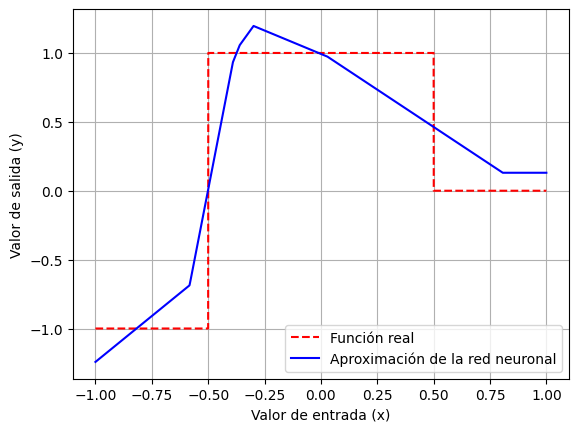

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.3428
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0636
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0461
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0400
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0369
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0349
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0343
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.0335
Epoch 9/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0325
Epoch 10/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0322
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


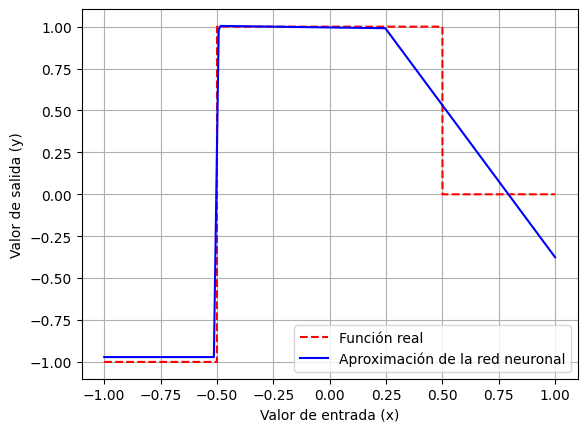

Epoch 1/10
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 62s 2ms/step - loss: 0.1508
Epoch 2/10
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - loss: 0.0065
Epoch 3/10
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 62s 2ms/step - loss: 0.0049
Epoch 4/10
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - loss: 0.0045
Epoch 5/10
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - loss: 0.0043
Epoch 6/10
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 63s 2ms/step - loss: 0.0043
Epoch 7/10
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 60s 2ms/step - loss: 0.0040
Epoch 8/10
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 0.0040
Epoch 9/10
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - loss: 0.0038
Epoch 10/10
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 62s 2ms/step - loss: 0.0036
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step


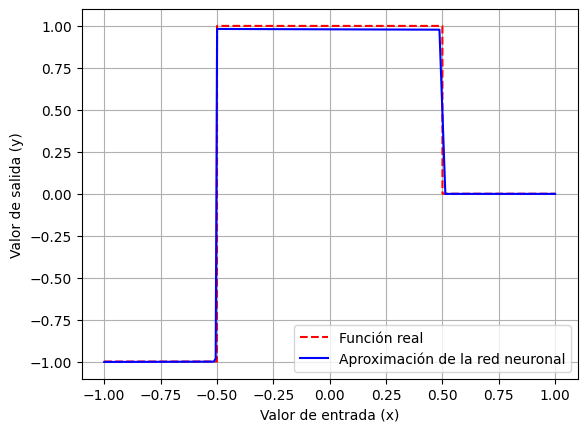

Epoch 1/10
312500/312500 ━━━━━━━━━━━━━━━━━━━━ 625s 2ms/step - loss: 0.0354
Epoch 2/10
312500/312500 ━━━━━━━━━━━━━━━━━━━━ 690s 2ms/step - loss: 0.0028
Epoch 3/10
312500/312500 ━━━━━━━━━━━━━━━━━━━━ 612s 2ms/step - loss: 0.0026
Epoch 4/10
312500/312500 ━━━━━━━━━━━━━━━━━━━━ 615s 2ms/step - loss: 0.0025
Epoch 5/10
312500/312500 ━━━━━━━━━━━━━━━━━━━━ 642s 2ms/step - loss: 0.0024
Epoch 6/10
312500/312500 ━━━━━━━━━━━━━━━━━━━━ 688s 2ms/step - loss: 0.0023
Epoch 7/10
312500/312500 ━━━━━━━━━━━━━━━━━━━━ 672s 2ms/step - loss: 0.0023
Epoch 8/10
312500/312500 ━━━━━━━━━━━━━━━━━━━━ 618s 2ms/step - loss: 0.0022
Epoch 9/10
312500/312500 ━━━━━━━━━━━━━━━━━━━━ 627s 2ms/step - loss: 0.0021
Epoch 10/10
312500/312500 ━━━━━━━━━━━━━━━━━━━━ 637s 2ms/step - loss: 0.0020
312500/312500 ━━━━━━━━━━━━━━━━━━━━ 380s 1ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


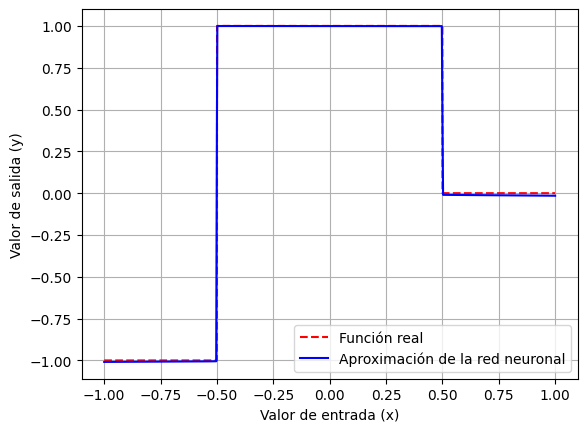

In [1]:
#El vostre codi aquí
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Función objetivo
def target_function(x):
    return np.where(x < -0.5, -1, np.where(x > 0.5, 0, 1))


# Generación del modelo con cambios
def generate_model(n_samples: int = 1000) -> keras.Model:
	np.random.seed(42)
	x = np.random.uniform(-1, 1, size=(n_samples, 1))
	y = target_function(x)
	model = keras.Sequential([
		layers.Dense(4, activation='relu', input_shape=(1,)),
		layers.Dense(4, activation='relu'),
		layers.Dense(1, activation='linear')
	])
	model.compile(optimizer='adam', loss='mse')
	model.fit(x, y, epochs=10, batch_size=32, verbose=1)
	return model

# Función para graficar predicciones
def plot_results(model: keras.Model, n_samples: int = 1000) -> None:
  x_test = np.linspace(-1, 1, n_samples).reshape(-1, 1)
  y_pred = model.predict(x_test)

  plt.plot(x_test, target_function(x_test), label='Función real', linestyle='dashed', color='red')
  plt.plot(x_test, y_pred, label='Aproximación de la red neuronal', color='blue')
  plt.xlabel('Valor de entrada (x)')
  plt.ylabel('Valor de salida (y)')
  plt.legend()
  plt.grid()
  plt.show()

# Entrenamiento y visualización con distintos tamaños de dataset
# 10 epochs y 32 bactch_size por defecto
model_10K = generate_model(n_samples=10000)
plot_results(model_10K, n_samples=10000)

model_100K = generate_model(n_samples=100000)
plot_results(model_100K, n_samples=100000)

model_1M = generate_model(n_samples=1000000)
plot_results(model_1M, n_samples=1000000)

model_10M = generate_model(n_samples=10000000)
plot_results(model_10M, n_samples=10000000)